# Objectif du projet

Construire un modèle de scoring crédit permettant de prédire la probabilité de défaut d’un client (TARGET),
dans le but de comparer un modèle de référence (baseline) à une méthode de machine learning plus récente
dans une démarche de preuve de concept.


In [147]:
%reload_ext autoreload
%autoreload 2

import gc

# numpy et pandas pour la manipulation du data
import numpy as np
import pandas as pd

# sklearn preprocessing pour traiter les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour tracer les graphes
import matplotlib.pyplot as plt
import seaborn as sns

#autres librairies
import missingno as msno
from sklearn.model_selection import train_test_split
import pandas as pd


In [148]:
# Chargement des données complètes
data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')

# Jeu d'entraînement : sélection de 10% avec stratification sur TARGET
train_sample, _ = train_test_split(
    data, 
    test_size=0.9, 
    random_state=42, 
    stratify=data['TARGET']  # Stratification sur la colonne TARGET
)
print(f"Le jeu d'entraînement (échantillon) contient {train_sample.shape[0]} lignes et {train_sample.shape[1]} colonnes.")

# Jeu de test : sélection de 10% sans stratification, car il n'a pas de colonne TARGET
test_sample = test_data.sample(frac=0.1, random_state=42)
print(f"Le jeu de test (échantillon) contient {test_sample.shape[0]} lignes et {test_sample.shape[1]} colonnes.")

Le jeu d'entraînement (échantillon) contient 30751 lignes et 122 colonnes.
Le jeu de test (échantillon) contient 4874 lignes et 121 colonnes.


In [149]:
# Jeu d'entraînement
#data = pd.read_csv('application_train.csv').sample(frac=0.01, random_state=42)  # Prendre 10% des données
#print(f"Le jeu d'entraînement (échantillon) contient {data.shape[0]} lignes et {data.shape[1]} colonnes.")

# Jeu de test
#test_data = pd.read_csv('application_test.csv').sample(frac=0.01, random_state=42)  # Prendre 10% des données
#print(f"Le jeu de test (échantillon) contient {test_data.shape[0]} lignes et {test_data.shape[1]} colonnes.")

In [150]:
# Ajouter la colonne TARGET au test_data avec des NaN
#test_data['TARGET'] = pd.NA  # Les valeurs TARGET dans le jeu de test sont des NaN



In [151]:
# Fusionner les deux datasets
#data = pd.concat([data, test_data], ignore_index=True).reset_index(drop=True)

In [152]:
# Afficher la taille des données après la fusion
#print(f"Data après la fusion contient {data.shape[0]} lignes et {data.shape[1]} colonnes.")

In [153]:
# Séparer à nouveau les jeux de données en utilisant la colonne TARGET
#train_data = data[data['TARGET'].notna()]  # Jeu d'entraînement
#test_data = data[data['TARGET'].isna()]    # Jeu de test

In [154]:
# Afficher la taille du jeu d'entraînement et du jeu de test
#print(f"Jeu d'entraînement contient {train_data.shape[0]} lignes et {train_data.shape[1]} colonnes.")
#print(f"Jeu de test contient {test_data.shape[0]} lignes et {test_data.shape[1]} colonnes.")

In [155]:
#print(set(train_data.columns) == set(test_data.columns))  # Doit retourner True si les colonnes correspondent


In [156]:
# Vérifier si TARGET dans train_data n'a pas de NaN
#print(train_data['TARGET'].isnull().sum())  # Doit retourner 0 (aucun NaN dans TARGET du train)

# Vérifier si TARGET dans test_data est rempli de NaN
#print(test_data['TARGET'].isnull().sum())  # Doit retourner le nombre de lignes du jeu de test (4874 ici)

In [157]:
# Jeu d'entraînement
#data = pd.read_csv('application_train.csv')

# Afficher la taille du jeu de données
#print(f"Le jeu d'entraînement contient {data.shape[0]} lignes et {data.shape[1]} colonnes.")

In [158]:
data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [159]:
# Jeu de test
#test_data = pd.read_csv('application_test.csv')

# Afficher la taille du jeu de données de test
#print(f"Le jeu de test contient {test_data.shape[0]} lignes et {test_data.shape[1]} colonnes.")

In [160]:
test_data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Le jeu de test est plus petit et ne contient pas la variable TARGET

## Analyse exploratoire


Avant de fusionner les 2 fichiers (train et test) pour effectuer différents traitements, nous analyserons les différentes variables du jeu de données d'entraînement.



### La colonne TARGET


La variable TARGET est celle que notre modèle doit prédire

- TARGET=1 correspond à un prêt non remboursé
- TARGET=0 correspond à un prêt remboursé

In [161]:
data['TARGET'].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

Nous avons affaire ici à un problème de classification binaire, avec un jeu d'entraînement déséquilibré. Il y a beaucoup plus de prêts remboursés que de prêts non remboursés. (92% de prêts remboursés)

Avant d'entraîner un modèle supervisé, il faudra rééquilibrer le jeu de données afin d'obtenir un nombre identique de classes pour la TARGET.

### Valeurs manquantes


On va maintenant examiner le nombre de valeurs manquantes pour chaque colonne



In [162]:
# Calcul des valeurs manquantes en pourcentage
nan_percent = data.isnull().mean() * 100

# Filtrer uniquement les colonnes ayant des valeurs manquantes
nan_columns = nan_percent[nan_percent > 0]

# Affichage des informations générales
print(f"Le jeu de données contient {data.shape[1]} colonnes.")
print(f"{len(nan_columns)} colonnes ont des valeurs manquantes.")

# Créer un DataFrame avec les valeurs manquantes et leur pourcentage
nan_info = pd.DataFrame({
    'Valeurs manquantes': data.isnull().sum(),
    '% de valeurs manquantes': nan_percent
})

# Filtrer pour ne garder que les colonnes ayant des valeurs manquantes
nan_info_filtered = nan_info[nan_info['Valeurs manquantes'] > 0]

# Trier les colonnes par le pourcentage de valeurs manquantes, de manière décroissante
nan_info_sorted = nan_info_filtered.sort_values(by='% de valeurs manquantes', ascending=False)

# Affichage du tableau formaté
print(nan_info_sorted)

Le jeu de données contient 122 colonnes.
67 colonnes ont des valeurs manquantes.
                          Valeurs manquantes  % de valeurs manquantes
COMMONAREA_MEDI                       214865                69.872297
COMMONAREA_MODE                       214865                69.872297
COMMONAREA_AVG                        214865                69.872297
NONLIVINGAPARTMENTS_MODE              213514                69.432963
NONLIVINGAPARTMENTS_MEDI              213514                69.432963
...                                      ...                      ...
EXT_SOURCE_2                             660                 0.214626
AMT_GOODS_PRICE                          278                 0.090403
AMT_ANNUITY                               12                 0.003902
CNT_FAM_MEMBERS                            2                 0.000650
DAYS_LAST_PHONE_CHANGE                     1                 0.000325

[67 rows x 2 columns]


Affichage graphique du remplissage des colonnes


<Axes: >

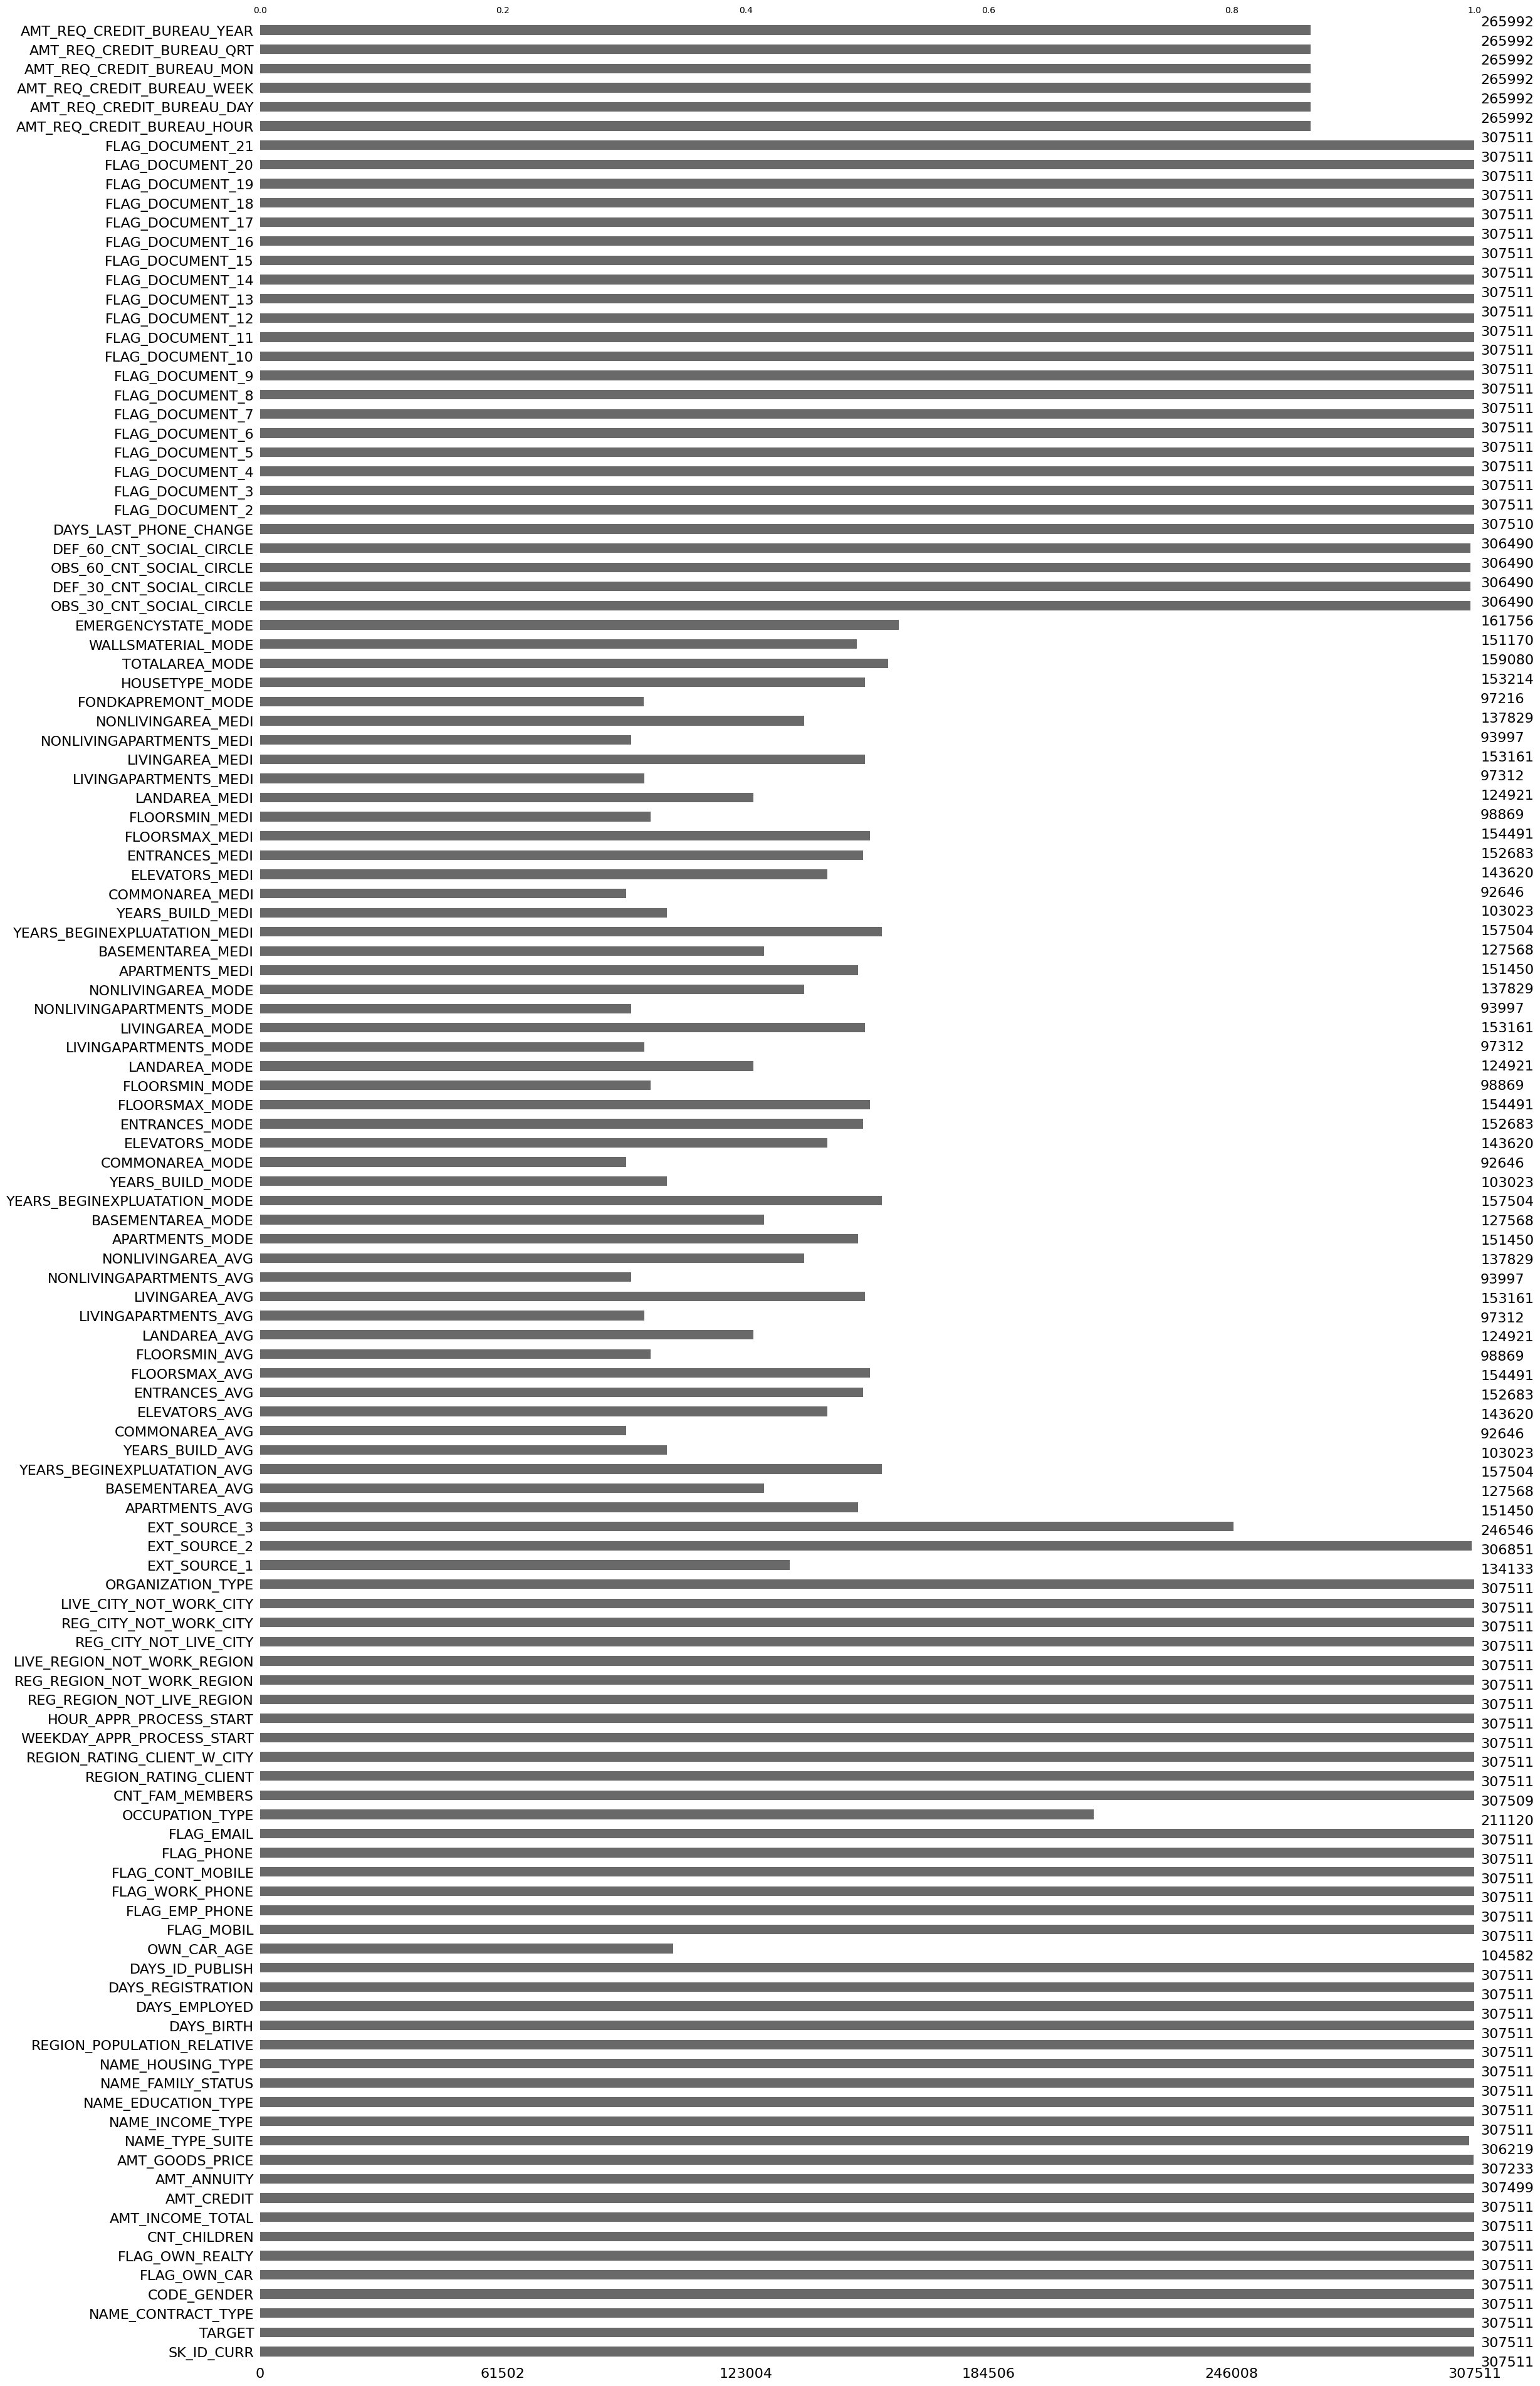

In [163]:
print("Affichage graphique du remplissage des colonnes")
msno.bar(data)

La plupart des colonnes sont bien remplies, et les moins remplies ont au moins 30% de valeurs non nulles, on va donc garder toutes les colonnes pour le moment.

Cela ne devrait pas poser de problème pour la suite de cette partie, mais il faudra quand même imputer ces valeurs manquantes avant d'entraîner nos modèles supervisés.

### Types des colonnes


In [164]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

Il y a 16 variables catégorielles, 41 variables sont des entiers, et 65 sont des nombres flottants



In [165]:
data_object_infos = data.select_dtypes("object").describe().T
data_object_infos["unique"] = data.select_dtypes("object").apply( pd.Series.unique, axis=0)
data_object_infos["nunique"] = data.select_dtypes("object").apply( pd.Series.nunique, axis=0)
data_object_infos

count  \
NAME_CONTRACT_TYPE          307511   
CODE_GENDER                 307511   
FLAG_OWN_CAR                307511   
FLAG_OWN_REALTY             307511   
NAME_TYPE_SUITE             306219   
NAME_INCOME_TYPE            307511   
NAME_EDUCATION_TYPE         307511   
NAME_FAMILY_STATUS          307511   
NAME_HOUSING_TYPE           307511   
OCCUPATION_TYPE             211120   
WEEKDAY_APPR_PROCESS_START  307511   
ORGANIZATION_TYPE           307511   
FONDKAPREMONT_MODE           97216   
HOUSETYPE_MODE              153214   
WALLSMATERIAL_MODE          151170   
EMERGENCYSTATE_MODE         161756   

                                                                       unique  \
NAME_CONTRACT_TYPE                              [Cash loans, Revolving loans]   
CODE_GENDER                                                       [M, F, XNA]   
FLAG_OWN_CAR                                                           [N, Y]   
FLAG_OWN_REALTY                                                        [Y, N]   
NAME_TYPE_SUITE             [Unaccompanied, Family, Spouse, partner, Child...   
NAME_INCOME_TYPE            [Working, State servant, Commercial associate,...   
NAME_EDUCATION_TYPE         [Secondary / secondary special, Higher educati...   
NAME_FAMILY_STATUS          [Single / not married, Married, Civil marriage...   
NAME_HOUSING_TYPE           [House / apartment, Rented apartment, With par...   
OCCUPATION_TYPE             [Laborers, Core staff, Accountants, Managers, ...   
WEEKDAY_APPR_PROCESS_START  [WEDNESDAY, MONDAY, THURSDAY, SUNDAY, SATURDAY...   
ORGANIZATION_TYPE           [Business Entity Type 3, School, Government, R...   
FONDKAPREMONT_MODE          [reg oper account, nan, org spec account, reg ...   
HOUSETYPE_MODE              [block of flats, nan, terraced house, specific...   
WALLSMATERIAL_MODE          [Stone, brick, Block, nan, Panel, Mixed, Woode...   
EMERGENCYSTATE_MODE                                            [No, nan, Yes]   

                                                      top    freq  nunique  
NAME_CONTRACT_TYPE                             Cash loans  278232        2  
CODE_GENDER                                             F  202448        3  
FLAG_OWN_CAR                                            N  202924        2  
FLAG_OWN_REALTY                                         Y  213312        2  
NAME_TYPE_SUITE                             Unaccompanied  248526        7  
NAME_INCOME_TYPE                                  Working  158774        8  
NAME_EDUCATION_TYPE         Secondary / secondary special  218391        5  
NAME_FAMILY_STATUS                                Married  196432        6  
NAME_HOUSING_TYPE                       House / apartment  272868        6  
OCCUPATION_TYPE                                  Laborers   55186       18  
WEEKDAY_APPR_PROCESS_START                        TUESDAY   53901        7  
ORGANIZATION_TYPE                  Business Entity Type 3   67992       58  
FONDKAPREMONT_MODE                       reg oper account   73830        4  
HOUSETYPE_MODE                             block of flats  150503        3  
WALLSMATERIAL_MODE                                  Panel   66040        7  
EMERGENCYSTATE_MODE                                    No  159428        2

In [166]:
data_int_infos = pd.DataFrame(data.select_dtypes("int64").apply(pd.Series.nunique,axis=0),columns=["Nombre de valeur unique"])
data_int_infos["valeur unique"] = data.select_dtypes("int64").apply(pd.Series.unique,axis=0)
data_int_infos.sort_values(by="Nombre de valeur unique")

Nombre de valeur unique  \
TARGET                                             2   
FLAG_EMP_PHONE                                     2   
FLAG_MOBIL                                         2   
REG_REGION_NOT_LIVE_REGION                         2   
FLAG_EMAIL                                         2   
FLAG_PHONE                                         2   
FLAG_CONT_MOBILE                                   2   
FLAG_WORK_PHONE                                    2   
FLAG_DOCUMENT_4                                    2   
FLAG_DOCUMENT_3                                    2   
FLAG_DOCUMENT_2                                    2   
LIVE_CITY_NOT_WORK_CITY                            2   
REG_CITY_NOT_WORK_CITY                             2   
REG_CITY_NOT_LIVE_CITY                             2   
LIVE_REGION_NOT_WORK_REGION                        2   
REG_REGION_NOT_WORK_REGION                         2   
FLAG_DOCUMENT_5                                    2   
FLAG_DOCUMENT_6                                    2   
FLAG_DOCUMENT_7                                    2   
FLAG_DOCUMENT_8                                    2   
FLAG_DOCUMENT_9                                    2   
FLAG_DOCUMENT_10                                   2   
FLAG_DOCUMENT_11                                   2   
FLAG_DOCUMENT_12                                   2   
FLAG_DOCUMENT_20                                   2   
FLAG_DOCUMENT_19                                   2   
FLAG_DOCUMENT_18                                   2   
FLAG_DOCUMENT_17                                   2   
FLAG_DOCUMENT_16                                   2   
FLAG_DOCUMENT_15                                   2   
FLAG_DOCUMENT_14                                   2   
FLAG_DOCUMENT_13                                   2   
FLAG_DOCUMENT_21                                   2   
REGION_RATING_CLIENT                               3   
REGION_RATING_CLIENT_W_CITY                        3   
CNT_CHILDREN                                      15   
HOUR_APPR_PROCESS_START                           24   
DAYS_ID_PUBLISH                                 6168   
DAYS_EMPLOYED                                  12574   
DAYS_BIRTH                                     17460   
SK_ID_CURR                                    307511   

                                                                 valeur unique  
TARGET                                                                  [1, 0]  
FLAG_EMP_PHONE                                                          [1, 0]  
FLAG_MOBIL                                                              [1, 0]  
REG_REGION_NOT_LIVE_REGION                                              [0, 1]  
FLAG_EMAIL                                                              [0, 1]  
FLAG_PHONE                                                              [1, 0]  
FLAG_CONT_MOBILE                                                        [1, 0]  
FLAG_WORK_PHONE                                                         [0, 1]  
FLAG_DOCUMENT_4                                                         [0, 1]  
FLAG_DOCUMENT_3                                                         [1, 0]  
FLAG_DOCUMENT_2                                                         [0, 1]  
LIVE_CITY_NOT_WORK_CITY                                                 [0, 1]  
REG_CITY_NOT_WORK_CITY                                                  [0, 1]  
REG_CITY_NOT_LIVE_CITY                                                  [0, 1]  
LIVE_REGION_NOT_WORK_REGION                                             [0, 1]  
REG_REGION_NOT_WORK_REGION                                              [0, 1]  
FLAG_DOCUMENT_5                                                         [0, 1]  
FLAG_DOCUMENT_6                                                         [0, 1]  
FLAG_DOCUMENT_7                                                         [0, 1]  
FLAG_DOCUMENT_8                                         

In [167]:
data_float_infos = pd.DataFrame(data.select_dtypes("float64").apply(pd.Series.nunique,axis=0),columns=["Nombre de valeur unique"])
data_float_infos["valeur unique"] = data.select_dtypes("float64").apply(pd.Series.unique,axis=0)
data_float_infos.sort_values(by="Nombre de valeur unique")

Nombre de valeur unique  \
AMT_REQ_CREDIT_BUREAU_HOUR                        5   
DEF_60_CNT_SOCIAL_CIRCLE                          9   
AMT_REQ_CREDIT_BUREAU_WEEK                        9   
AMT_REQ_CREDIT_BUREAU_DAY                         9   
DEF_30_CNT_SOCIAL_CIRCLE                         10   
...                                             ...   
AMT_CREDIT                                     5603   
AMT_ANNUITY                                   13672   
DAYS_REGISTRATION                             15688   
EXT_SOURCE_1                                 114584   
EXT_SOURCE_2                                 119831   

                                                                valeur unique  
AMT_REQ_CREDIT_BUREAU_HOUR                     [0.0, nan, 1.0, 2.0, 3.0, 4.0]  
DEF_60_CNT_SOCIAL_CIRCLE    [2.0, 0.0, 1.0, nan, 3.0, 5.0, 4.0, 7.0, 24.0,...  
AMT_REQ_CREDIT_BUREAU_WEEK  [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ...  
AMT_REQ_CREDIT_BUREAU_DAY   [0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ...  
DEF_30_CNT_SOCIAL_CIRCLE    [2.0, 0.0, 1.0, nan, 3.0, 4.0, 5.0, 6.0, 7.0, ...  
...                                                                       ...  
AMT_CREDIT                  [406597.5, 1293502.5, 135000.0, 312682.5, 5130...  
AMT_ANNUITY                 [24700.5, 35698.5, 6750.0, 29686.5, 21865.5, 2...  
DAYS_REGISTRATION           [-3648.0, -1186.0, -4260.0, -9833.0, -4311.0, ...  
EXT_SOURCE_1                [0.0830369673913225, 0.3112673113812225, nan, ...  
EXT_SOURCE_2                [0.2629485927471776, 0.6222457752555098, 0.555...  

[65 rows x 2 columns]

### Analyse des variables


On va afficher différents graphes sur les variables : des diagrammes en camembert, des histogrammes ainsi que des boîtes à moustache

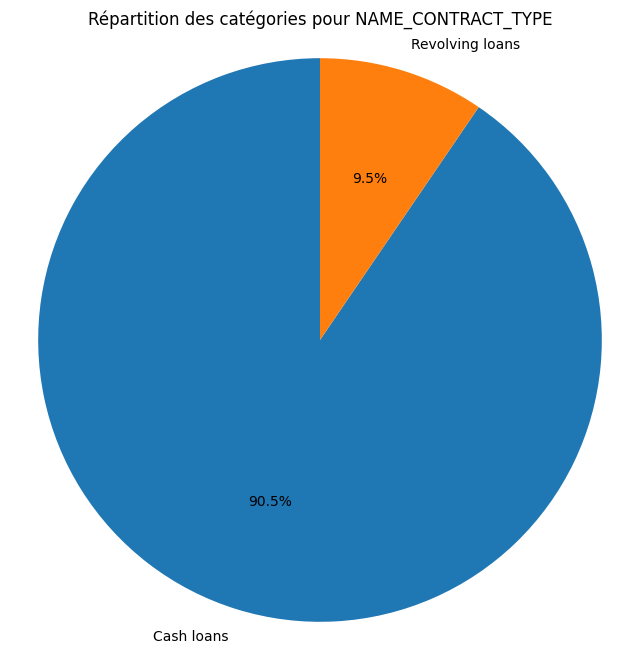

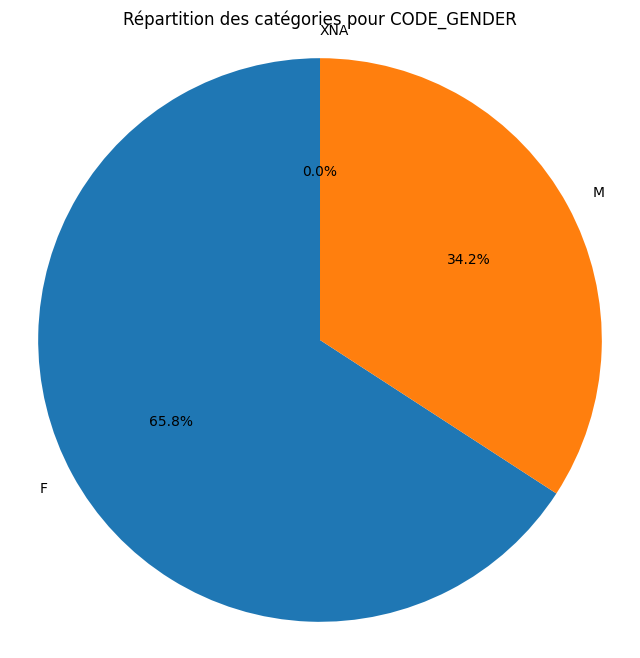

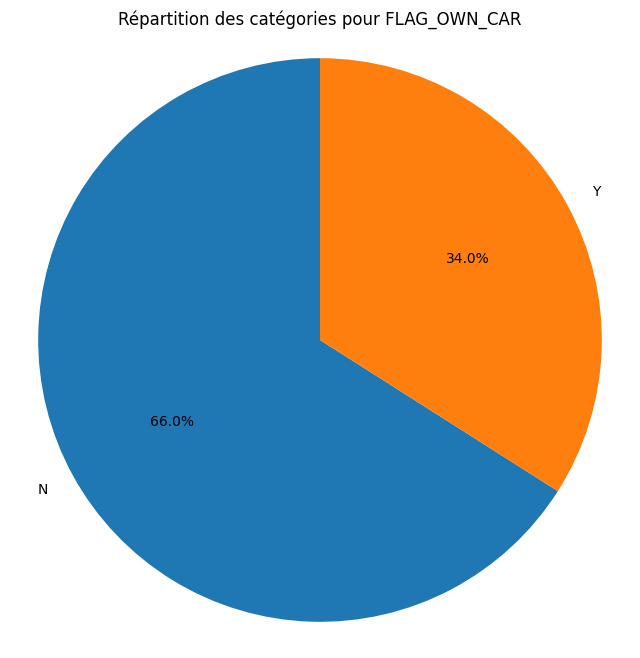

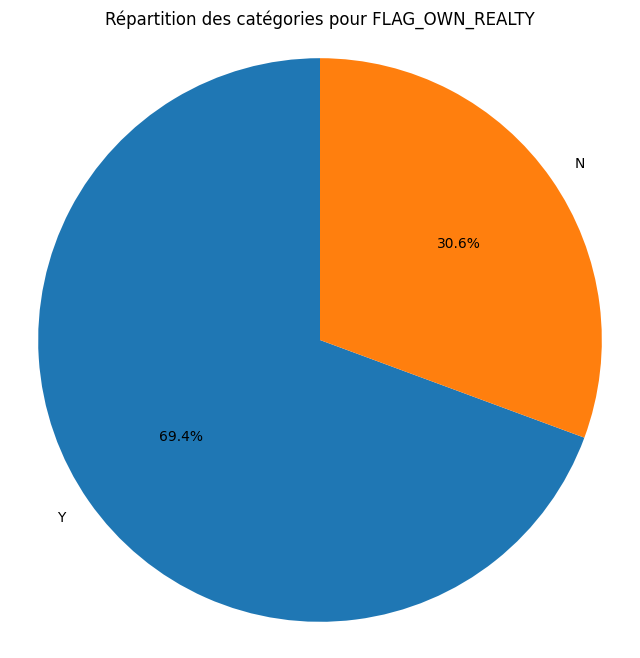

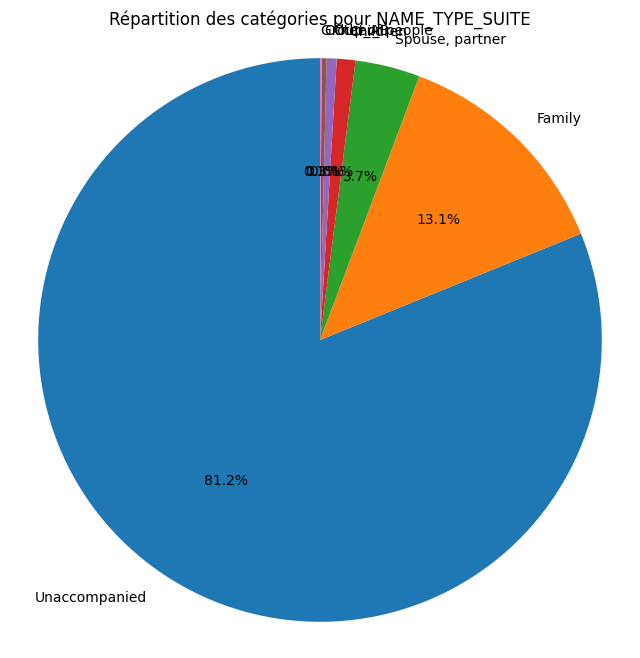

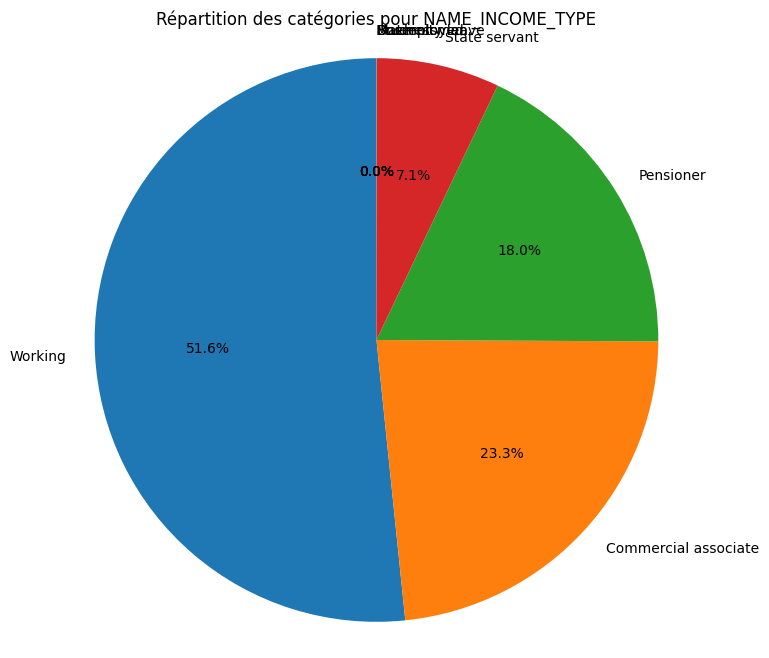

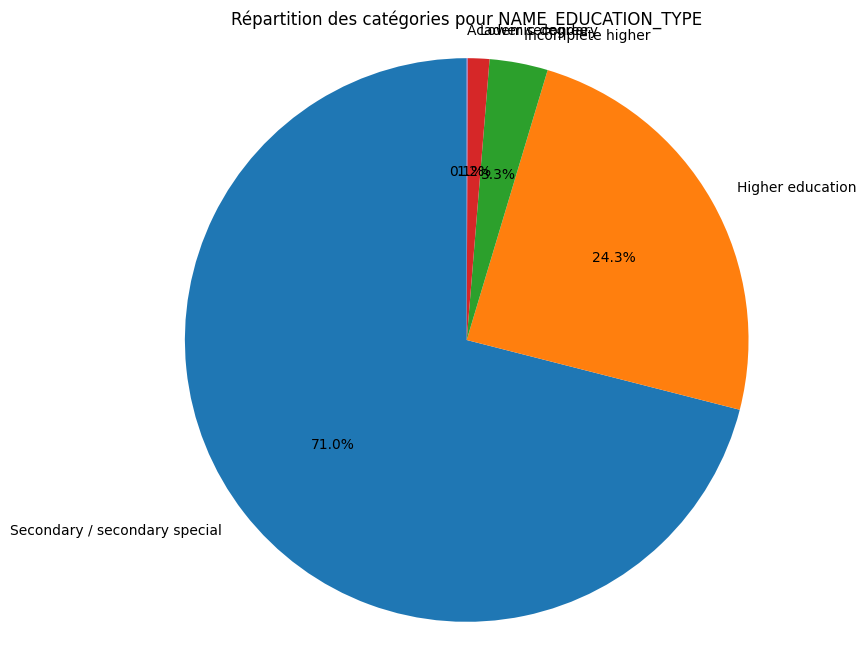

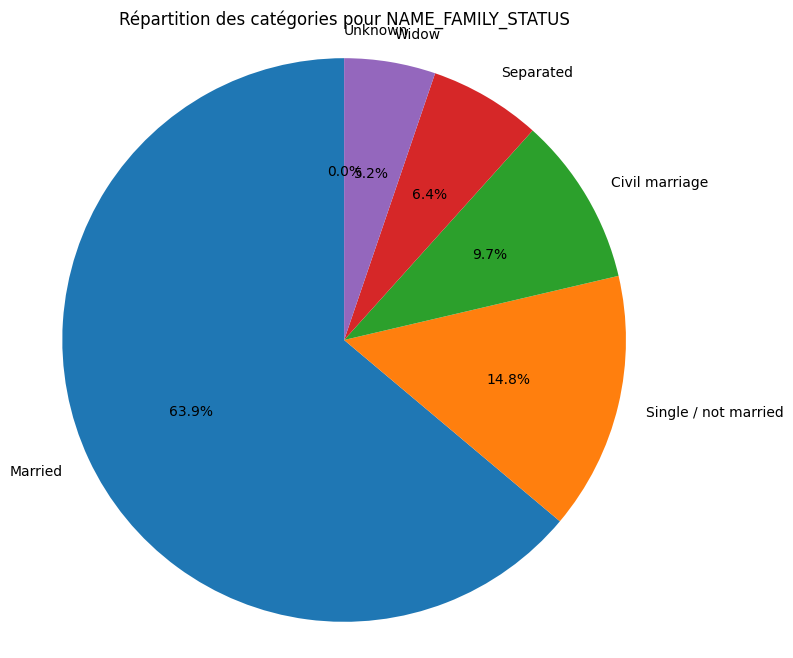

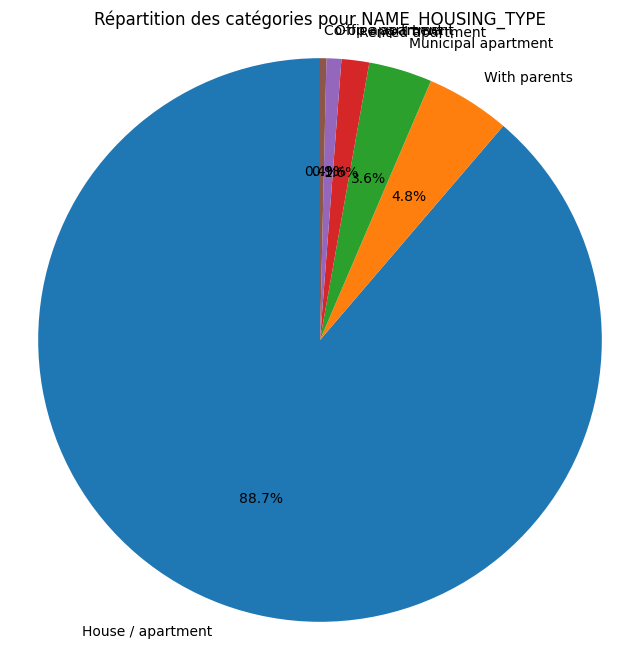

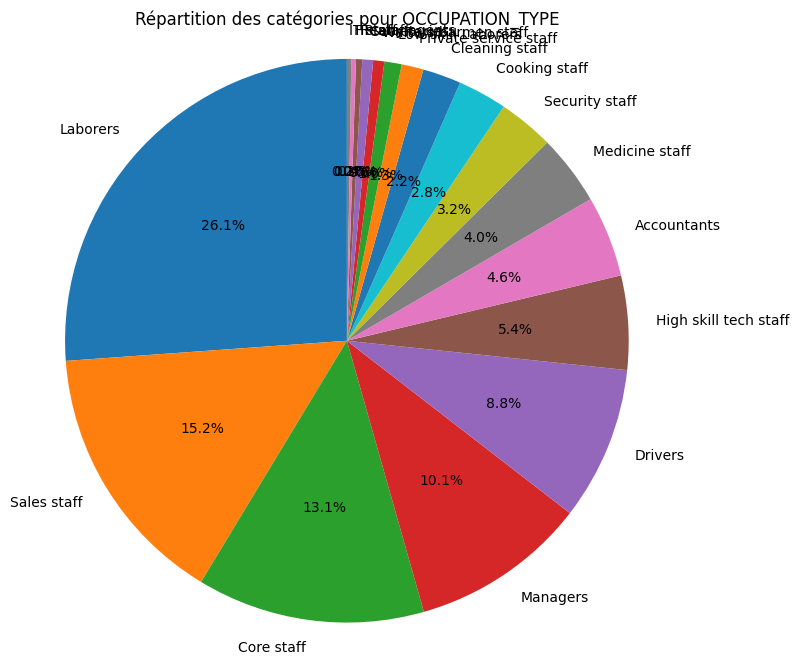

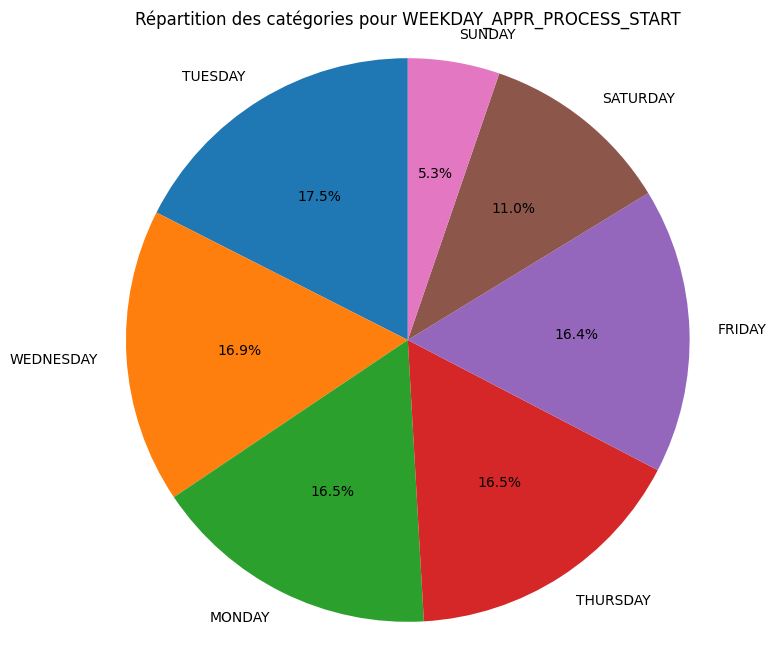

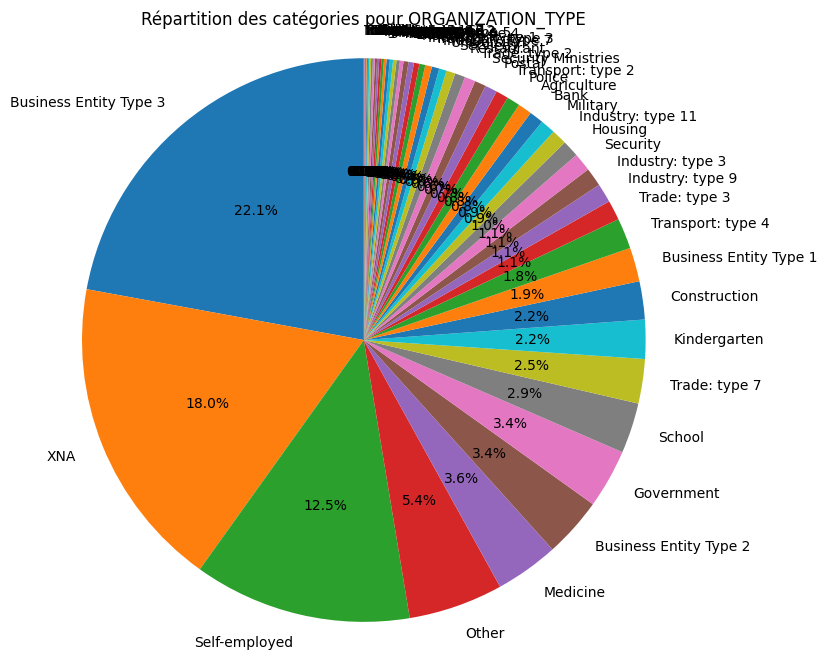

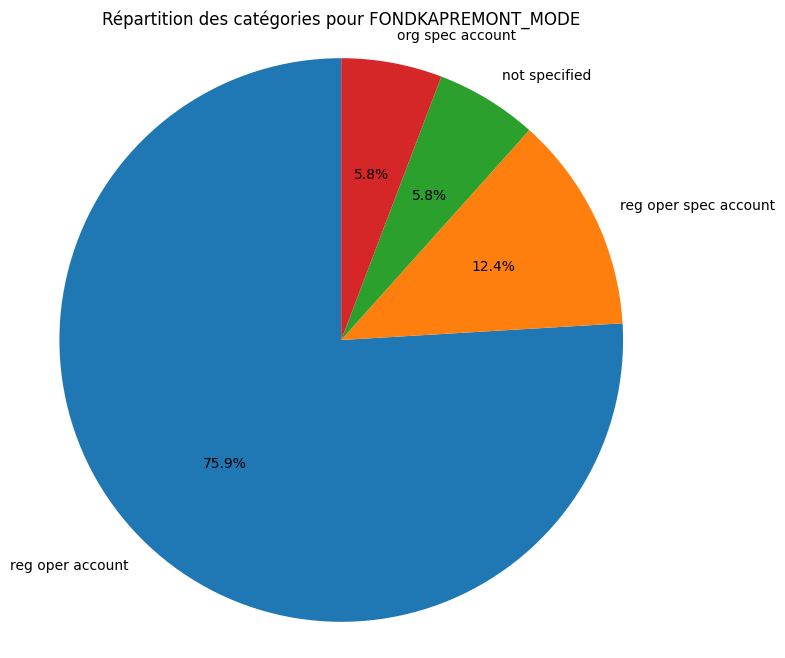

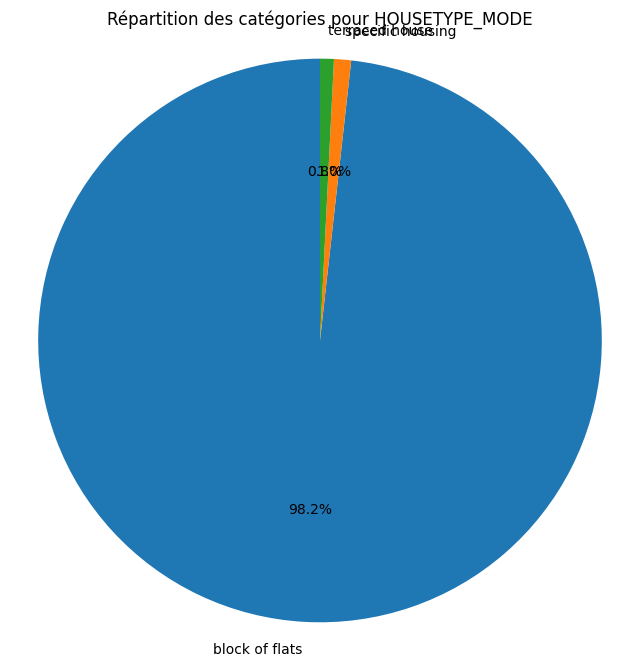

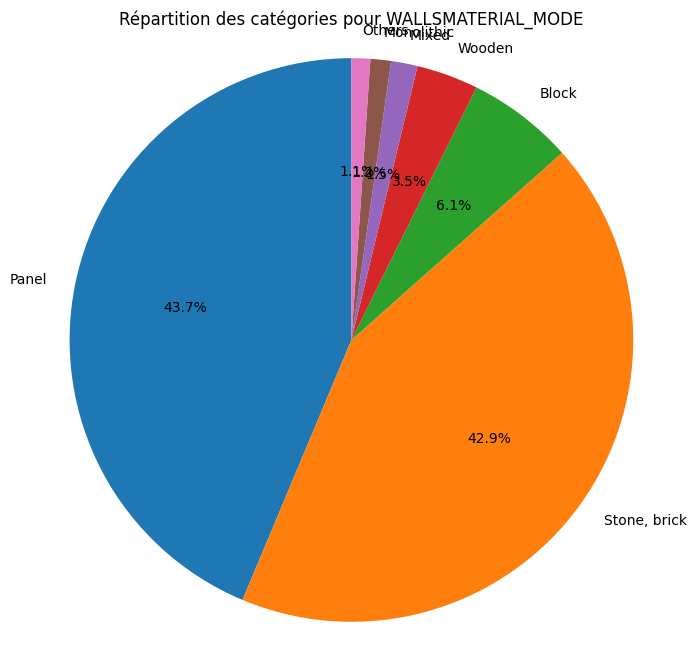

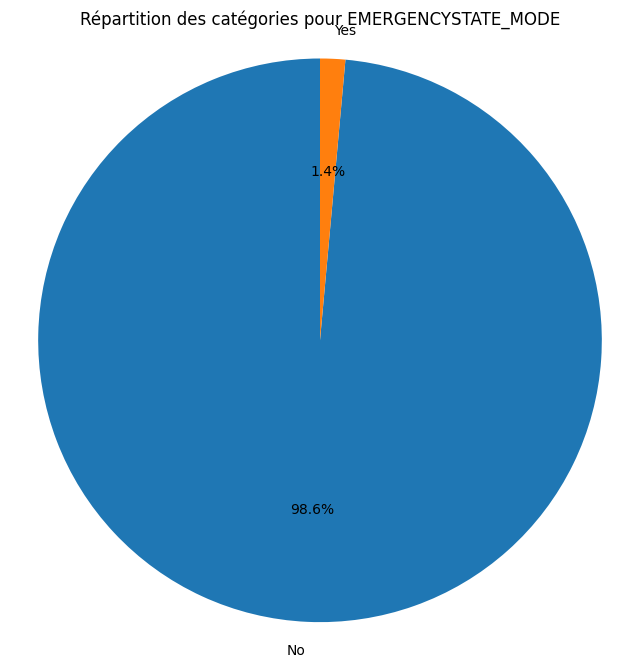

In [168]:
# Sélectionner les colonnes catégorielles (qualitatives)
categorical_columns = data.select_dtypes(include=['object']).columns

# Afficher un pie chart pour chaque variable catégorielle
for col in categorical_columns:
    # Compter les occurrences de chaque catégorie
    counts = data[col].value_counts()

    # Créer un pie chart
    plt.figure(figsize=(8, 8))  # Taille du graphique
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Répartition des catégories pour {col}")
    plt.axis('equal')  # Assure que le pie chart est circulaire
    plt.show()

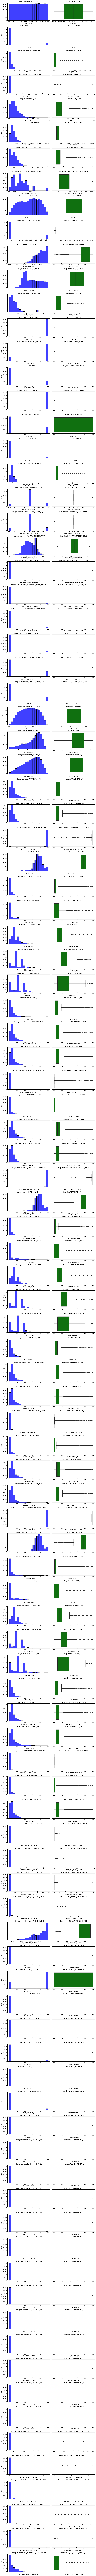

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner toutes les colonnes numériques (variables quantitatives)
quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Ajuster la taille de la figure en fonction du nombre de variables quantitatives
num_vars = len(quantitative_columns)
plt.figure(figsize=(12, num_vars * 3))  # Taille ajustée automatiquement selon le nombre de colonnes

# Boucle pour tracer les histogrammes et boxplots pour chaque variable quantitative
for i, col in enumerate(quantitative_columns):
    # Histogramme
    plt.subplot(num_vars, 2, 2*i+1)
    sns.histplot(data[col], bins=20, kde=False, color='blue')
    plt.title(f"Histogramme de {col}")
    
    # Boxplot
    plt.subplot(num_vars, 2, 2*i+2)
    sns.boxplot(x=data[col], color='green')
    plt.title(f"Boxplot de {col}")

# Ajuster les espacements entre les graphiques pour éviter qu'ils ne se chevauchent
plt.tight_layout()

# Afficher les graphiques
plt.show()

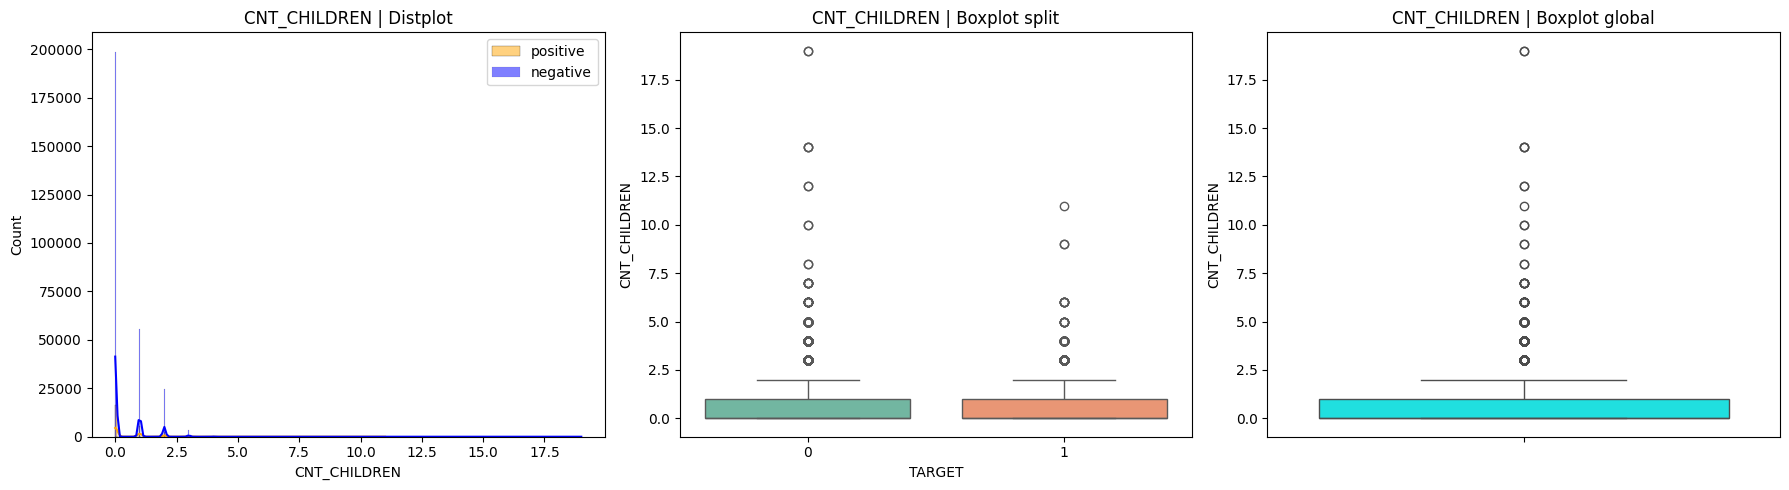

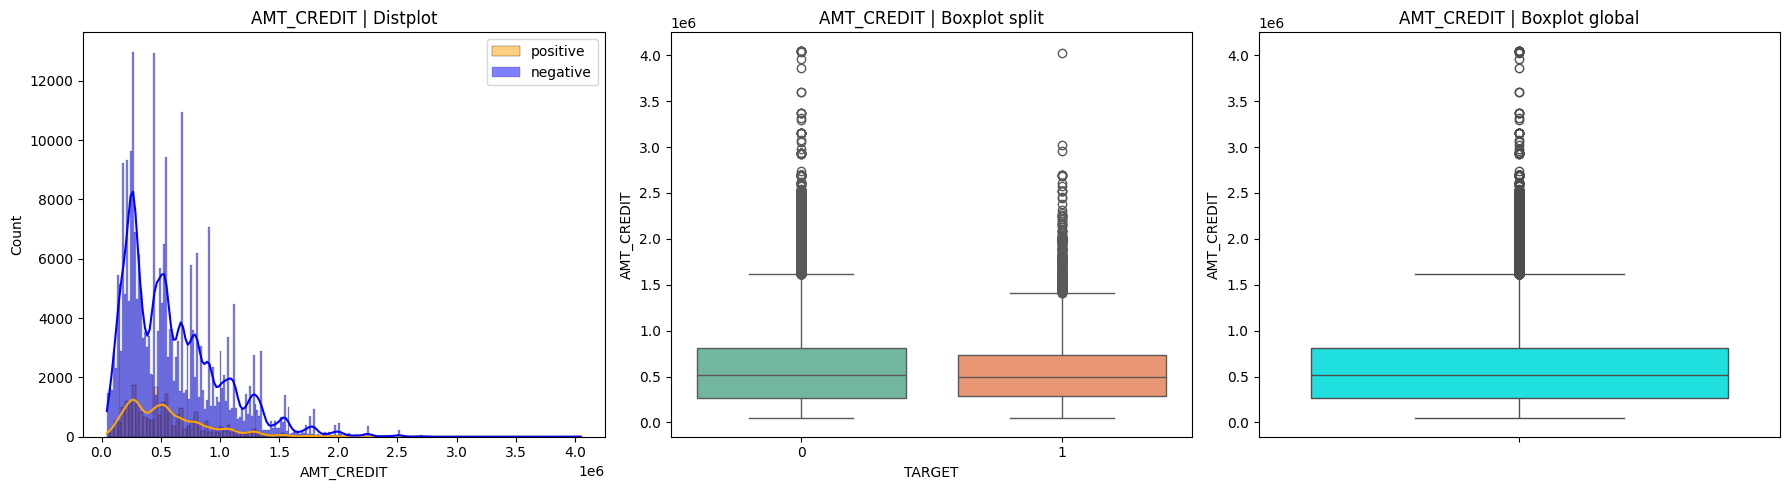

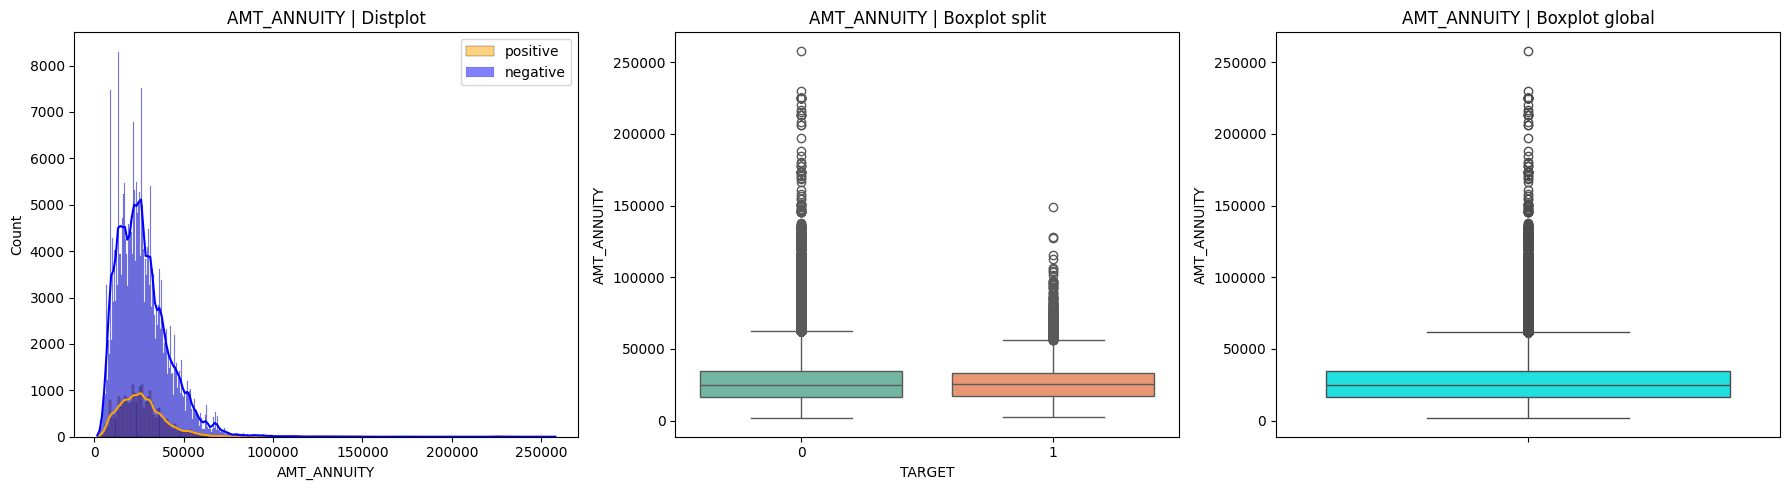

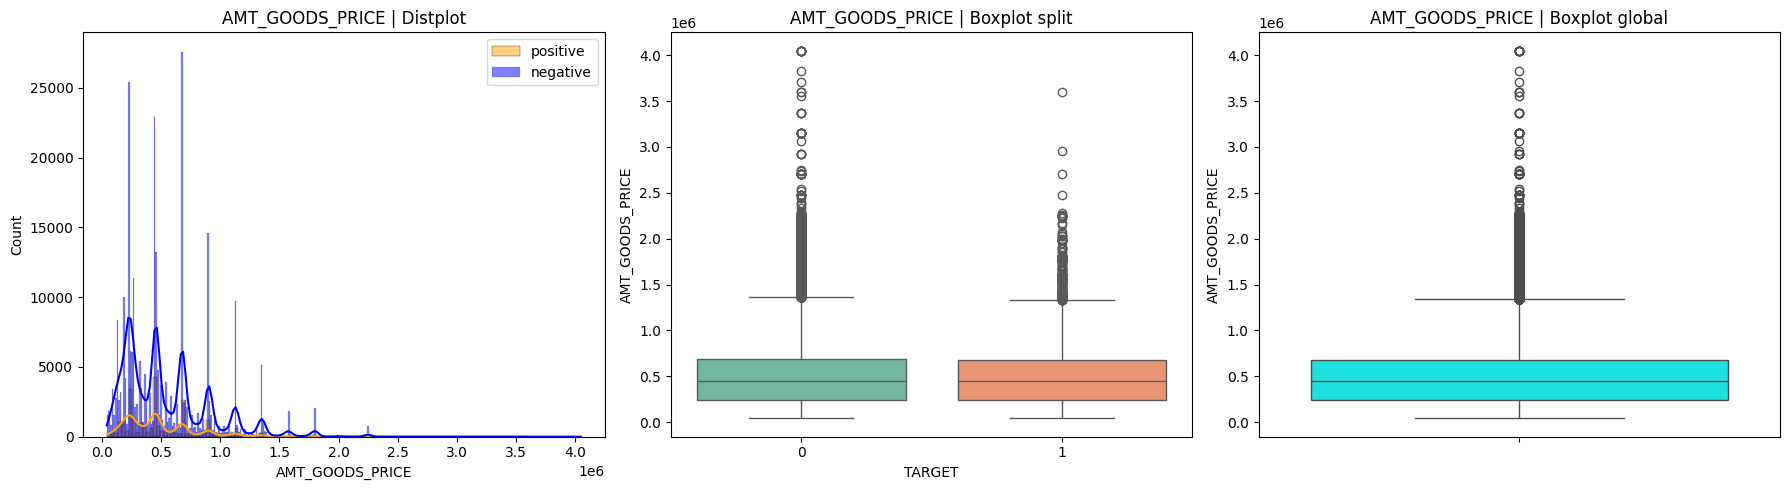

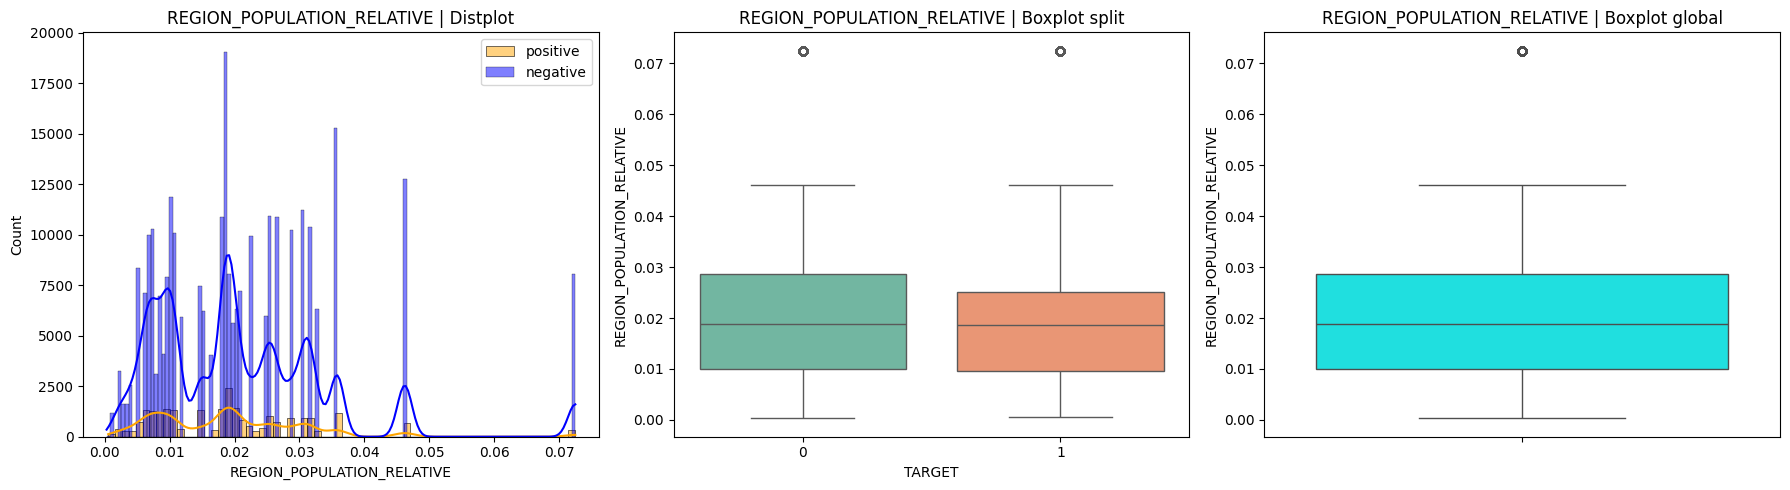

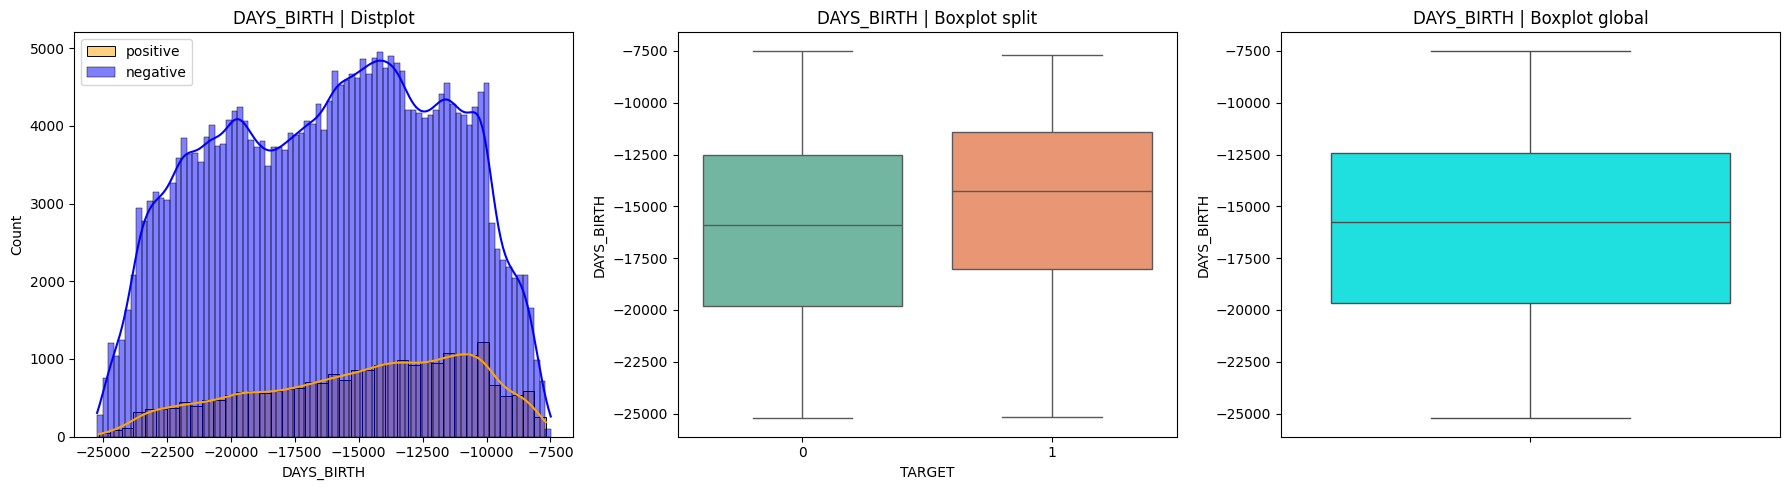

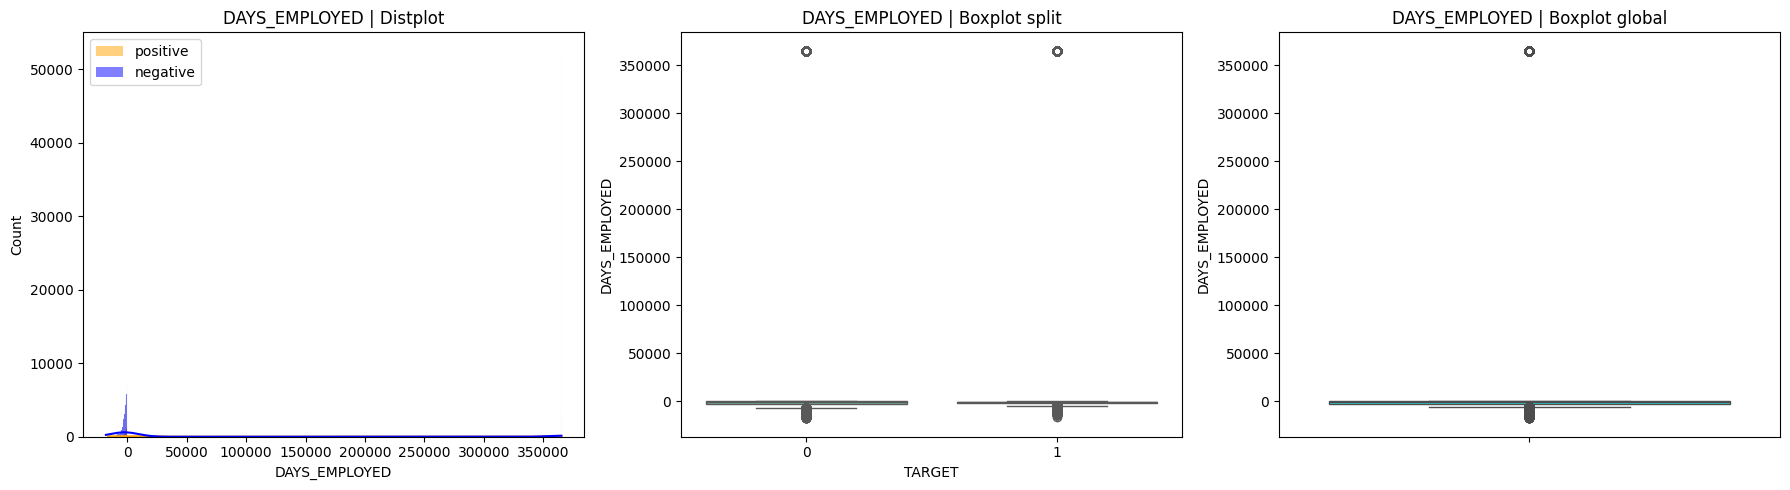

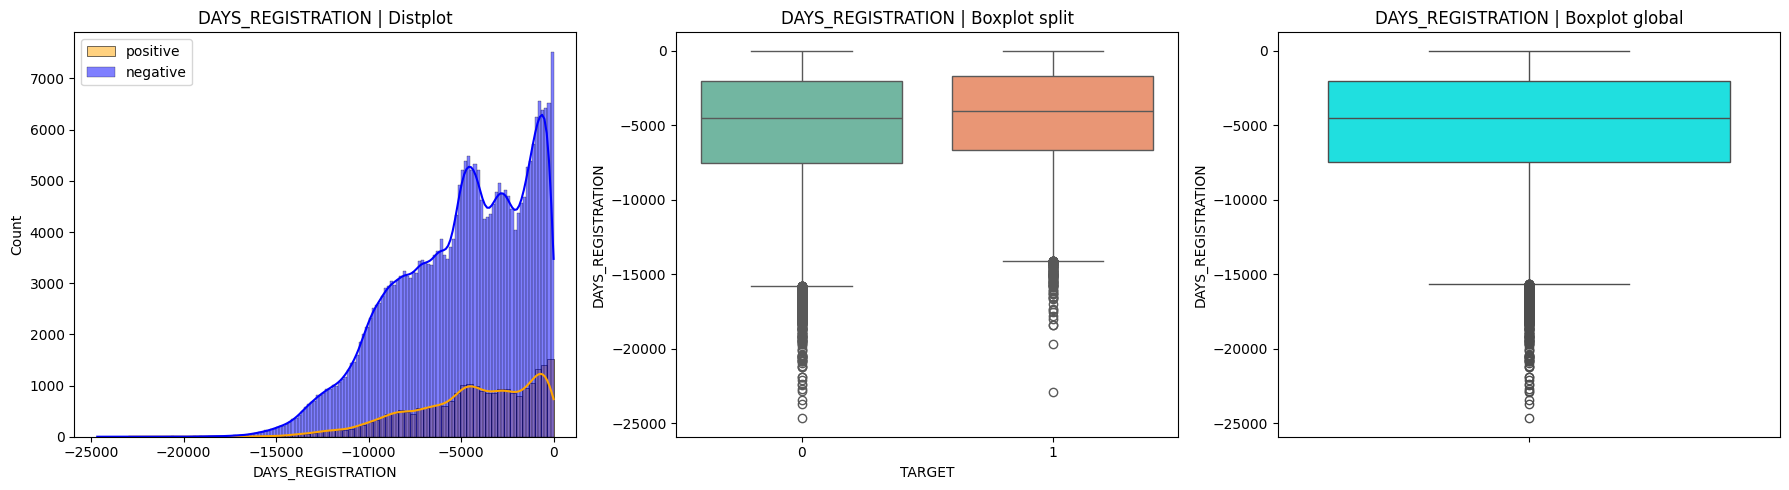

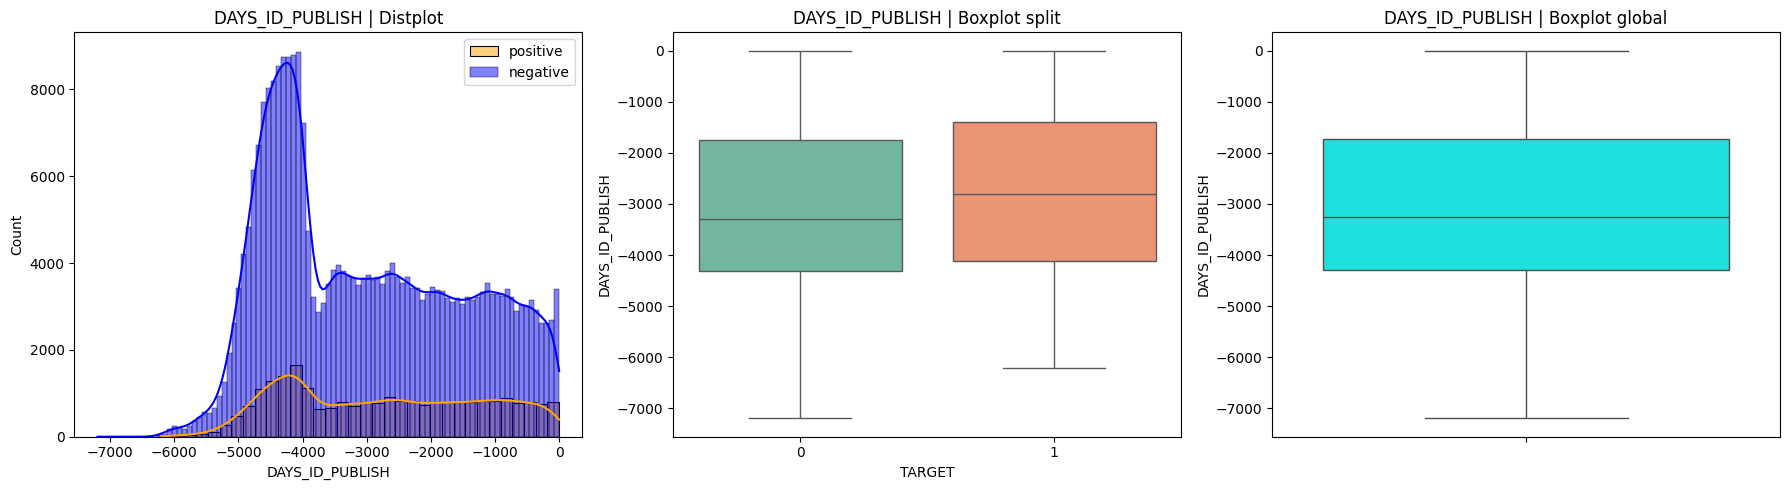

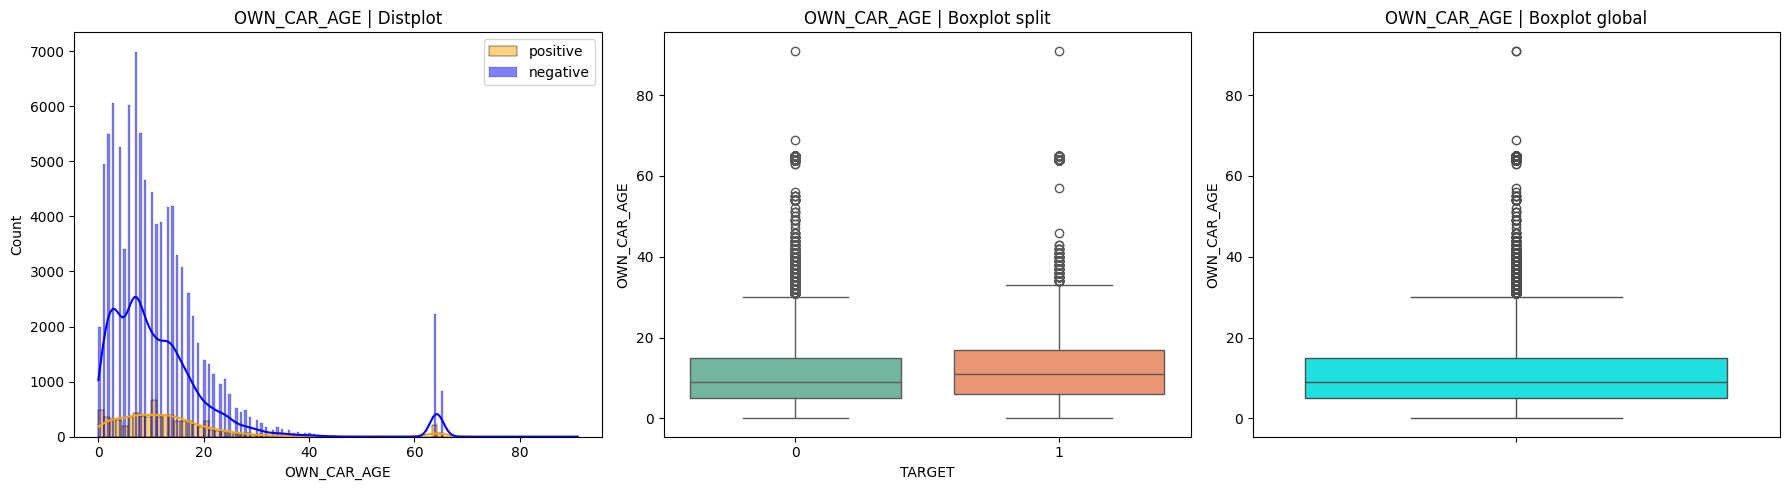

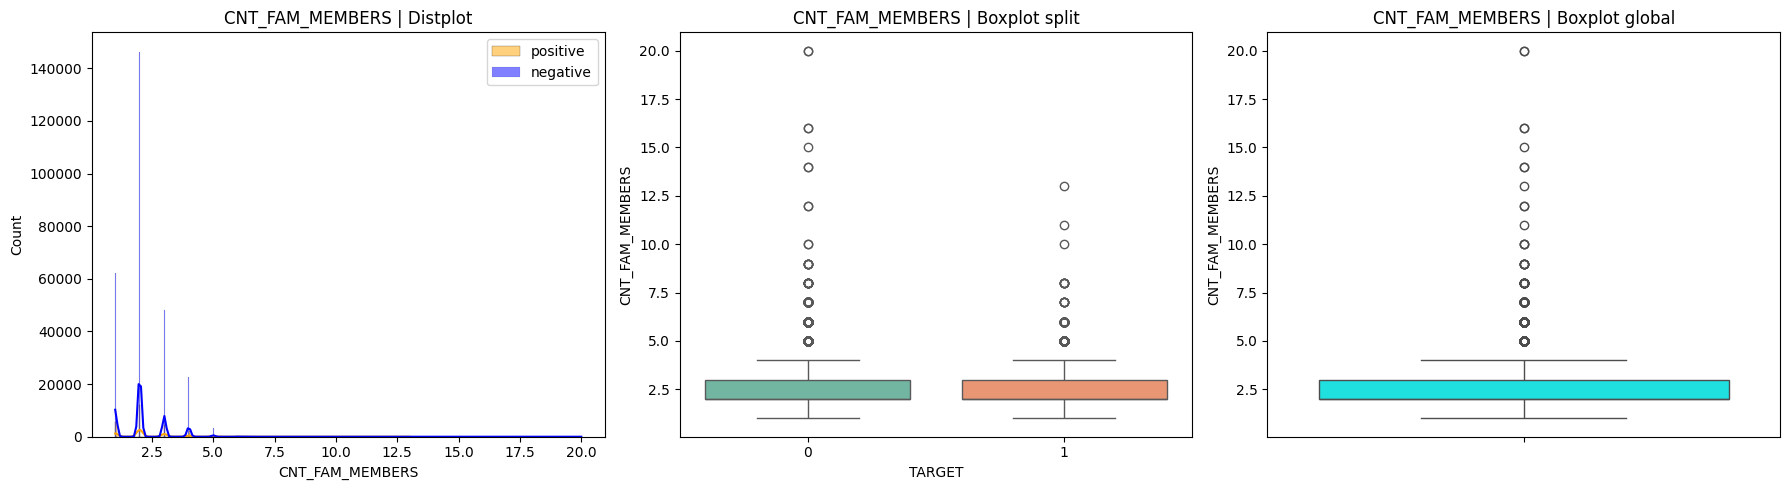

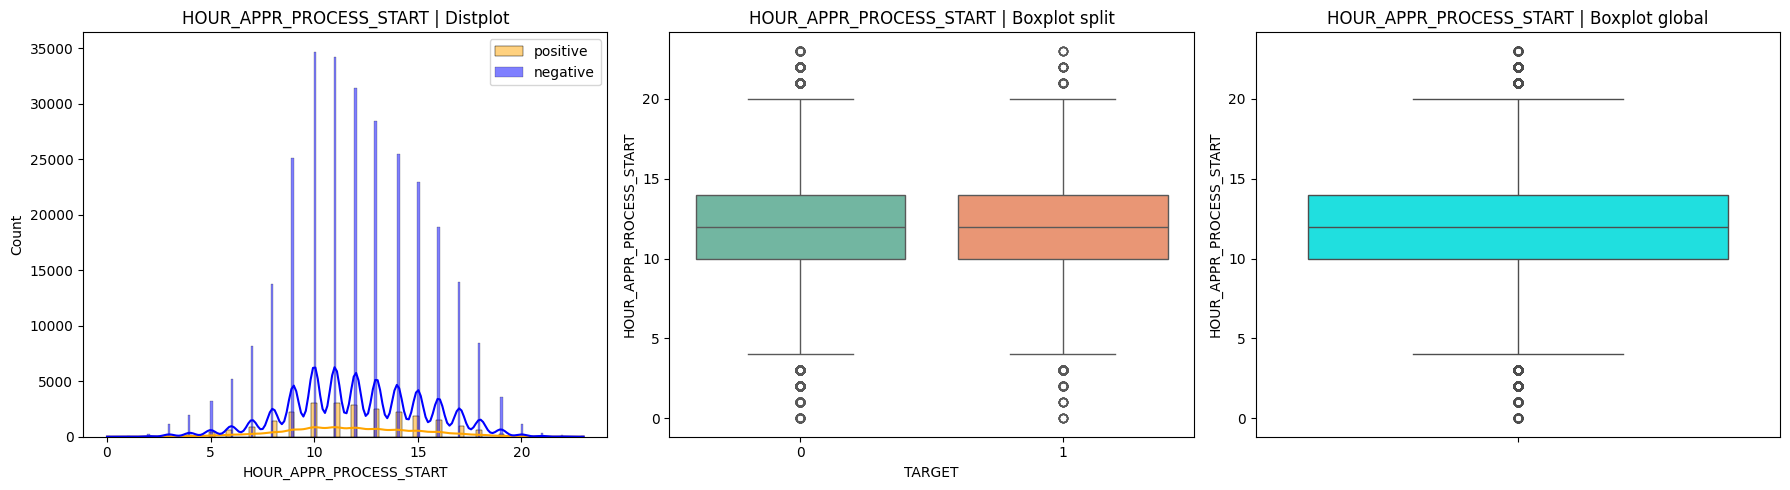

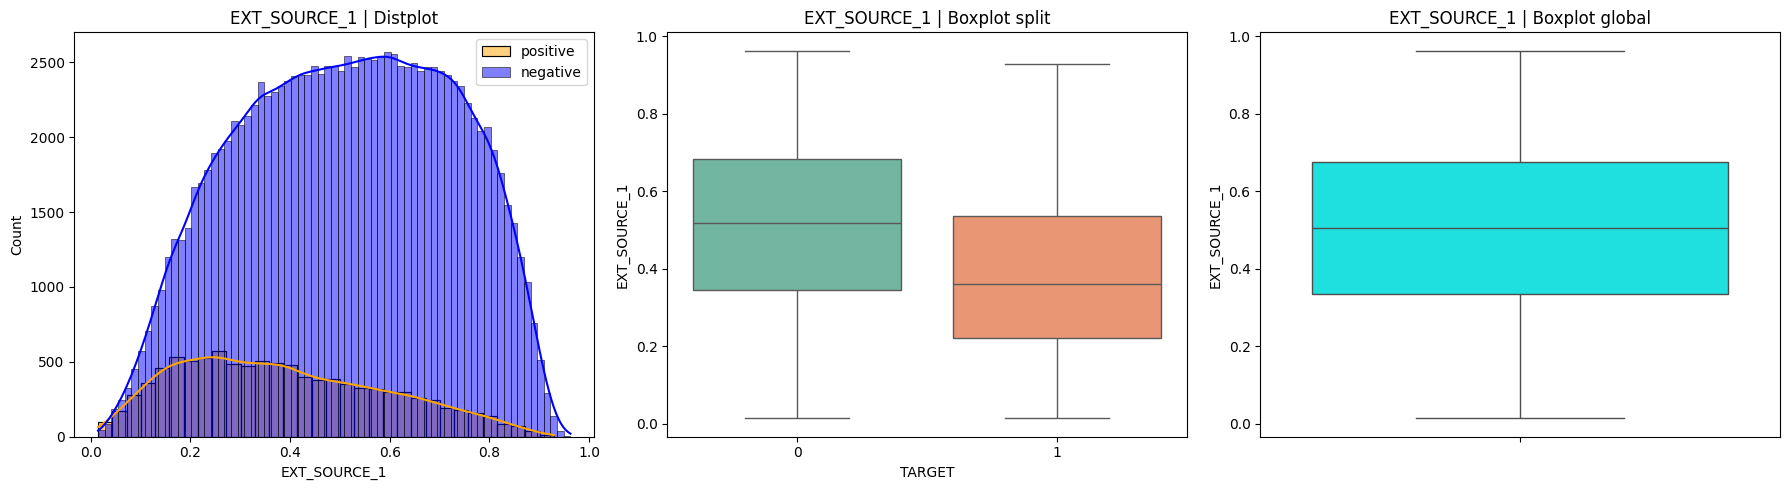

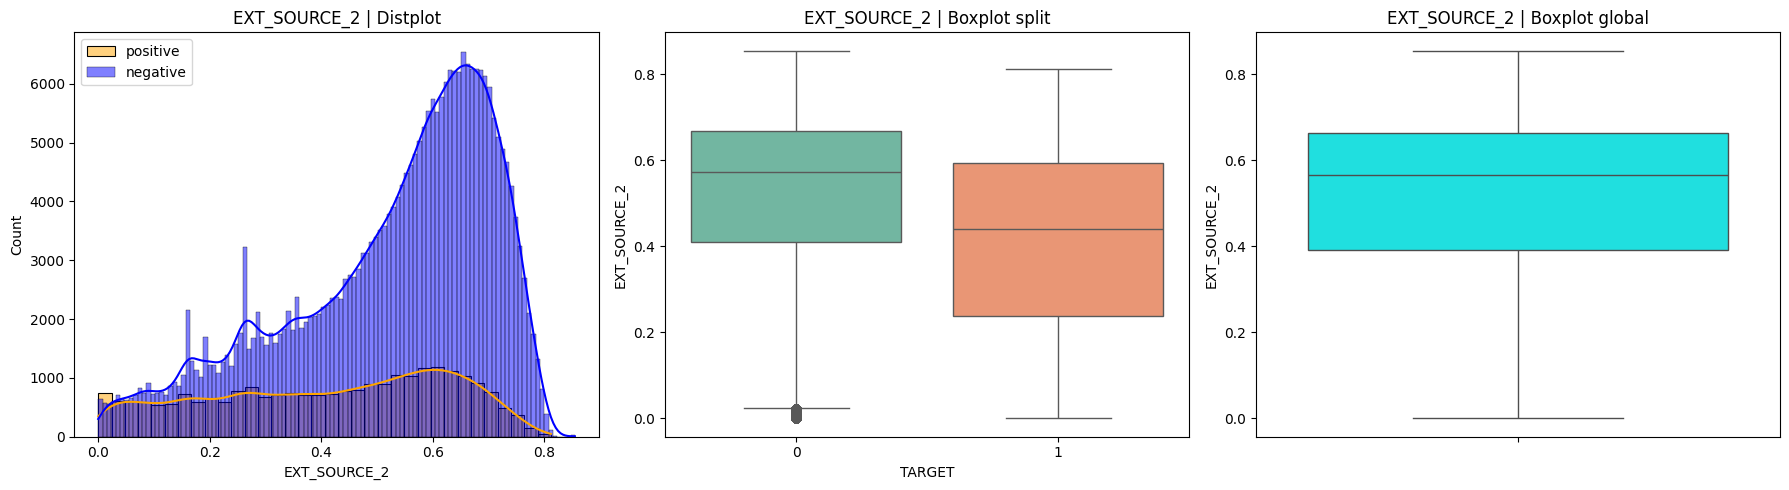

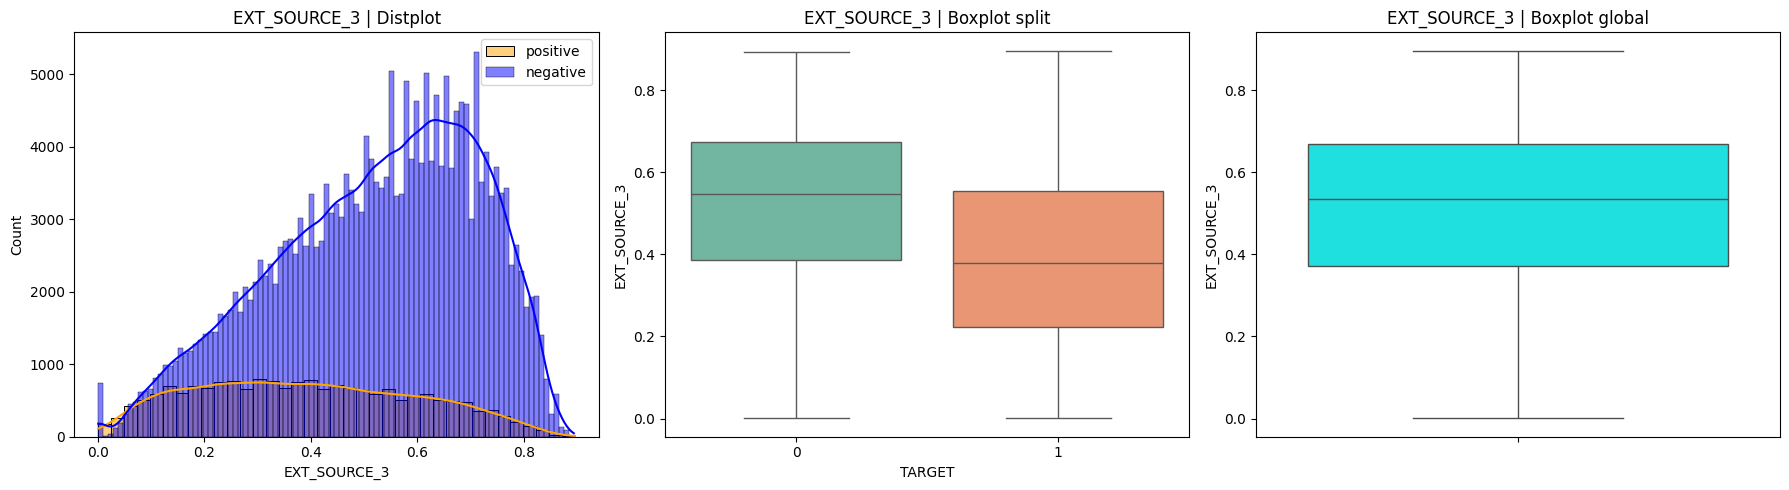

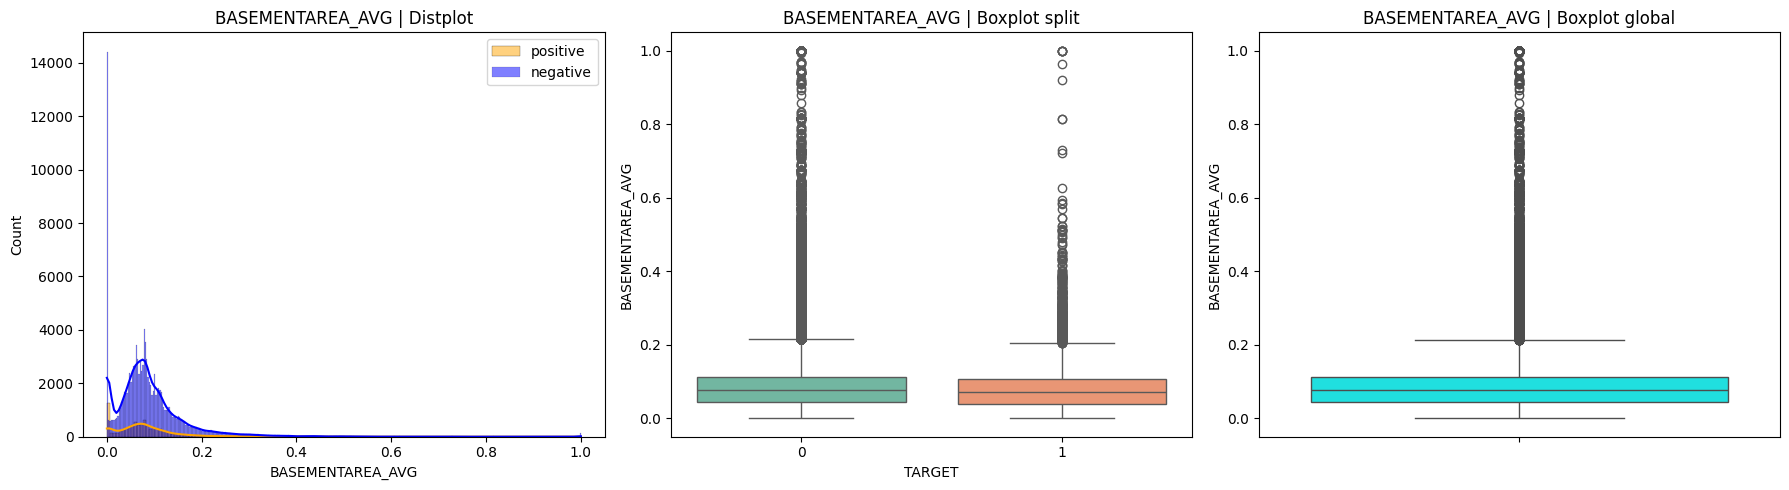

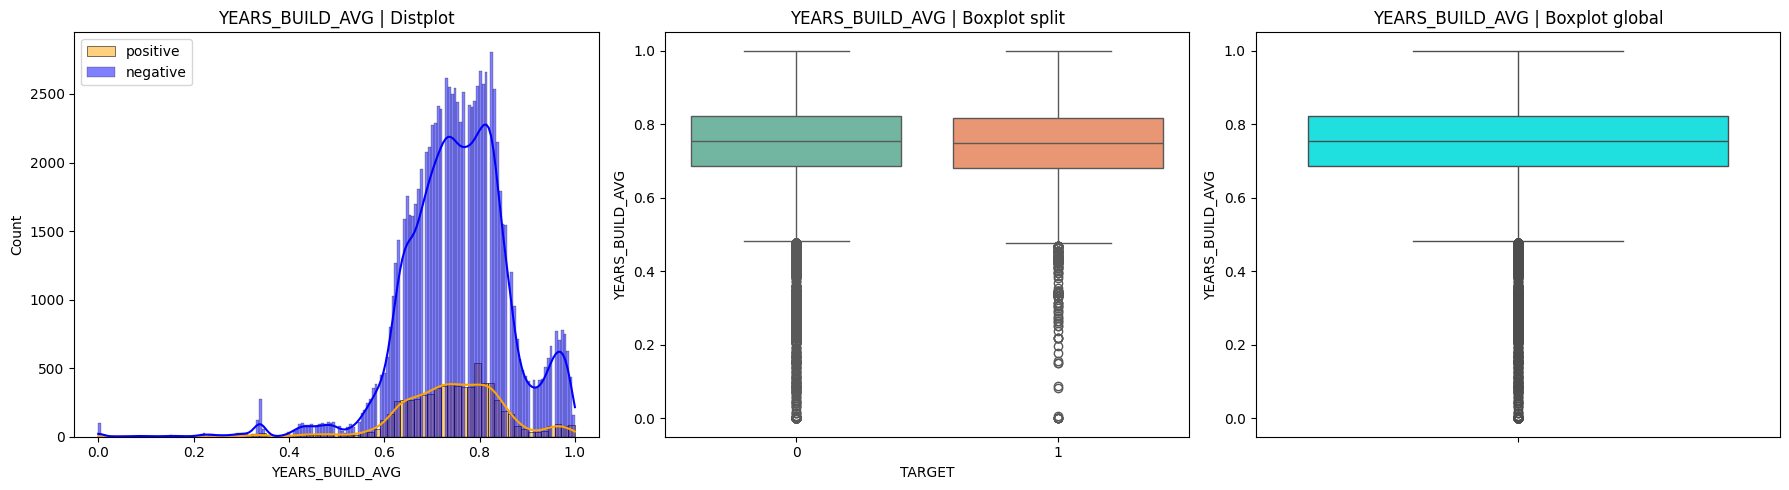

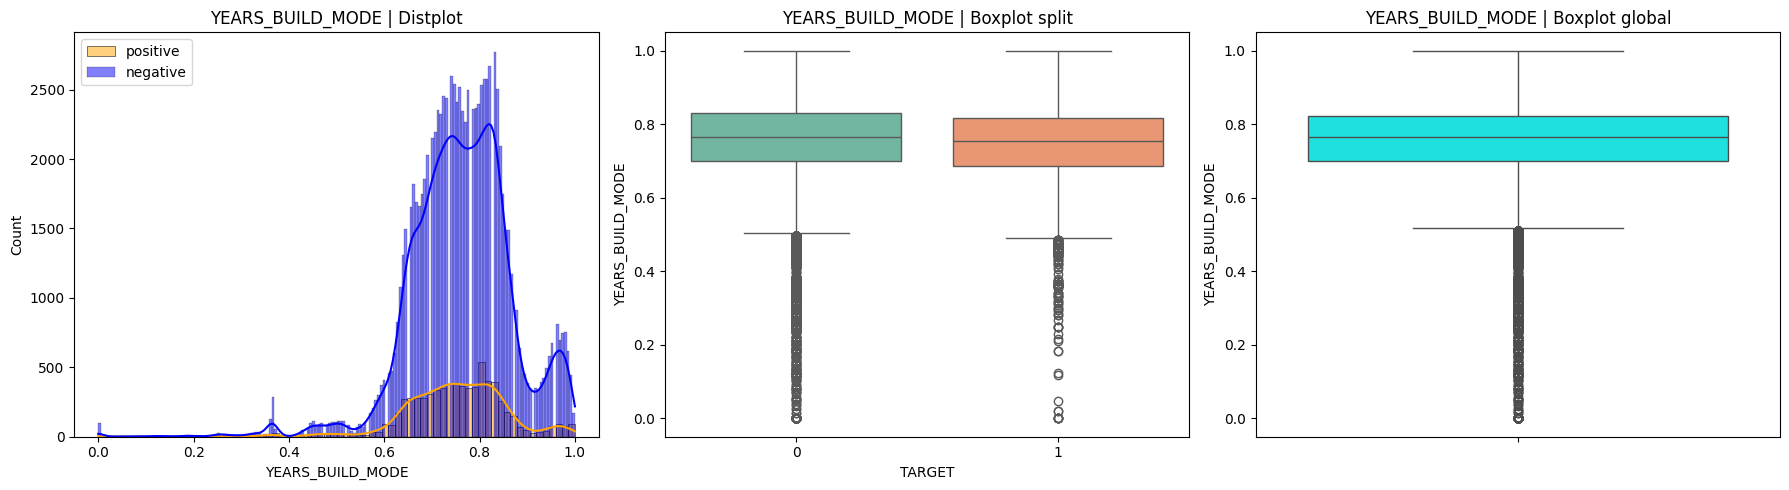

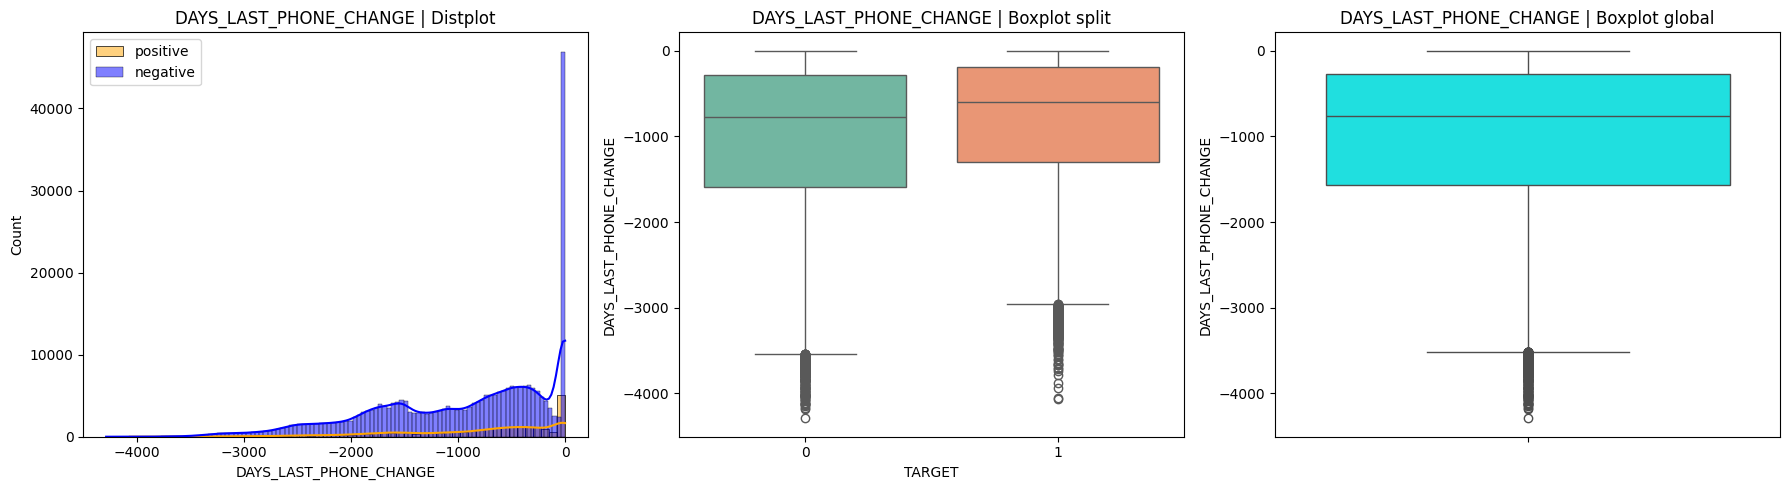

In [170]:
# Colonnes à analyser
columns_analyse = ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                   'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                   'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 
                   'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 
                   'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 
                   'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'DAYS_LAST_PHONE_CHANGE']

# Séparer les groupes en fonction de la variable TARGET
positive_target = data[data["TARGET"] == 1]
negative_target = data[data['TARGET'] == 0]

# Ajuster la taille de la figure en fonction du nombre de colonnes à analyser
for col in columns_analyse:
    plt.figure(figsize=(18, 5))
    
    # 1. Distribution (Distplot)
    plt.subplot(1, 3, 1)
    sns.histplot(positive_target[col], label='positive', color='orange', kde=True)
    sns.histplot(negative_target[col], label='negative', color='blue', kde=True)
    plt.title(f"{col} | Distplot")
    plt.legend()
    
    # 2. Boxplot divisé par TARGET
    plt.subplot(1, 3, 2)
    sns.boxplot(x="TARGET", y=col, data=data, palette="Set2")
    plt.title(f"{col} | Boxplot split")
    
    # 3. Boxplot global (sans distinction de TARGET)
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col], color='cyan')
    plt.title(f"{col} | Boxplot global")
    
    plt.tight_layout()
    plt.show()

En ne gardant seulement les variables les plus pertinentes pour observer la disparité entre la classe 0 et 1 de la TARGET, on peut déjà voir une corrélation assez marquée sur certaines variables comme:

DAYS_BIRTH
DAYS_ID_PUBLISH
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3

# Merge des fichiers, nettoyage et création de nouvelles variables

On va merger ensemble les fichiers application_train.csv et application_test.csv, pour y effectuer un nettoyage, un encodage des variables, et la création de nouvelles variables, afin de rendre le tout homogène.

Par la suite on redivisera le data en un data_train et un data_test comme à l'origine.

In [171]:
# Ajouter la colonne TARGET au test_data avec des NaN
test_data['TARGET'] = pd.NA  # Les valeurs TARGET dans le jeu de test sont des NaN

In [172]:
# Fusionner les deux datasets
data = pd.concat([data, test_data], ignore_index=True).reset_index(drop=True)

In [173]:
# Afficher la taille des données après la fusion
print(f"Data après la fusion contient {data.shape[0]} lignes et {data.shape[1]} colonnes.")


Data après la fusion contient 356255 lignes et 122 colonnes.


## Nettoyage


On va ici supprimer les valeurs aberrantes pour les variables CODE_GENDER et DAYS_EMPLOYED

Pour les autres variables, les valeurs aberrantes des boîtes à moustache analysées précedemment, correspondent à des features dont les informations en notre possession ne permettent pas de conclure sur la pertinence de ces valeurs.

In [174]:
data['CODE_GENDER'].value_counts()

CODE_GENDER
F      235126
M      121125
XNA         4
Name: count, dtype: int64

In [175]:
data = data[data['CODE_GENDER'] != "XNA"]

In [176]:
data['DAYS_EMPLOYED'].describe()

count    356251.000000
mean      64317.999498
std      141706.142237
min      -17912.000000
25%       -2781.000000
50%       -1224.000000
75%        -290.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: ylabel='Frequency'>

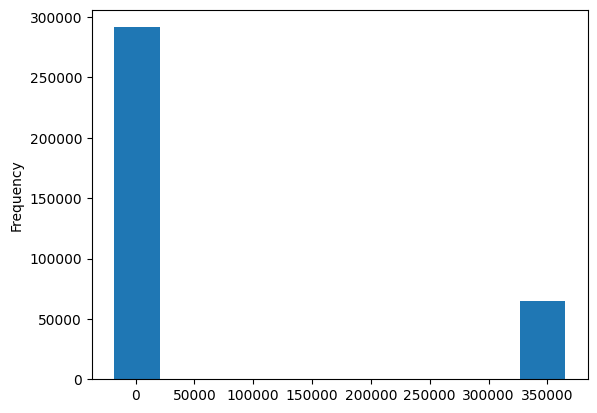

In [177]:
data['DAYS_EMPLOYED'].plot.hist()

Il ne doit y avoir que des valeurs négatives pour la variable 'DAYS_EMPLOYED', on remplace donc les valeurs aberrantes par la valeur NaN

In [178]:
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

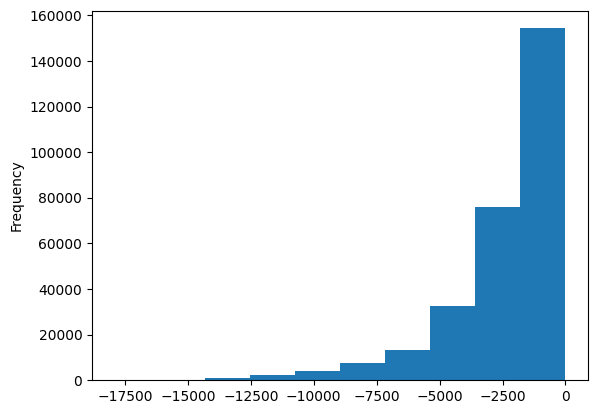

In [179]:
data['DAYS_EMPLOYED'].plot.hist();

## Création de nouvelles features


In [180]:
data['DAYS_EMPLOYED_PERC'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
data['INCOME_CREDIT_PERC'] = data['AMT_INCOME_TOTAL'] / data['AMT_CREDIT']
data['INCOME_PER_PERSON'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['ANNUITY_INCOME_PERC'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
del test_data
gc.collect()

218907

De manière à rendre notre jeu de données plus interprétable, on va créer de nouvelles features à partir des features actuelles.

Les nouvelles features sont :

- DAYS_EMPLOYED_PERC (% de jours employés par rapport à l'âge de la personne)
- INCOME_CREDIT_PERC (% entre le revenu et le montant du crédit)
- INCOME_PER_PERSON (Revenu divisé par le nombre de membres dans la famille)
- ANNUITY_INCOME_PERC (% entre le crédit de rente et le revenu)
- PAYMENT_RATE (% entre le crédit de rente et le montant du crédit)

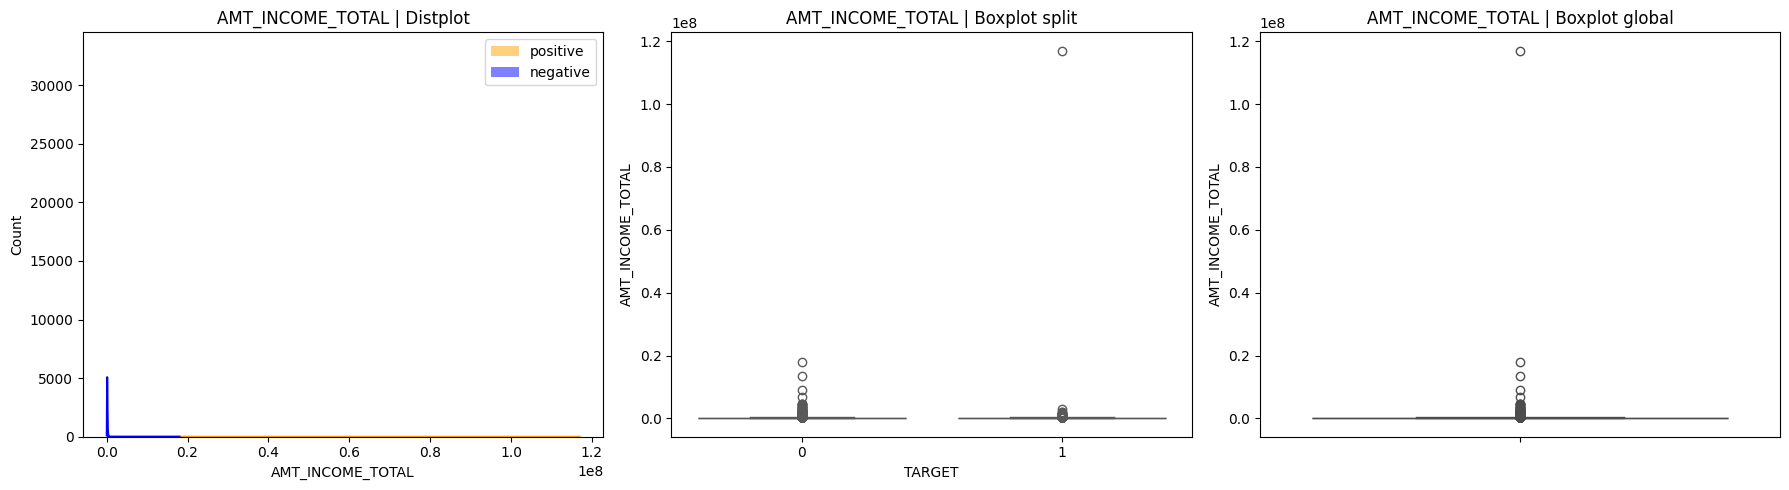

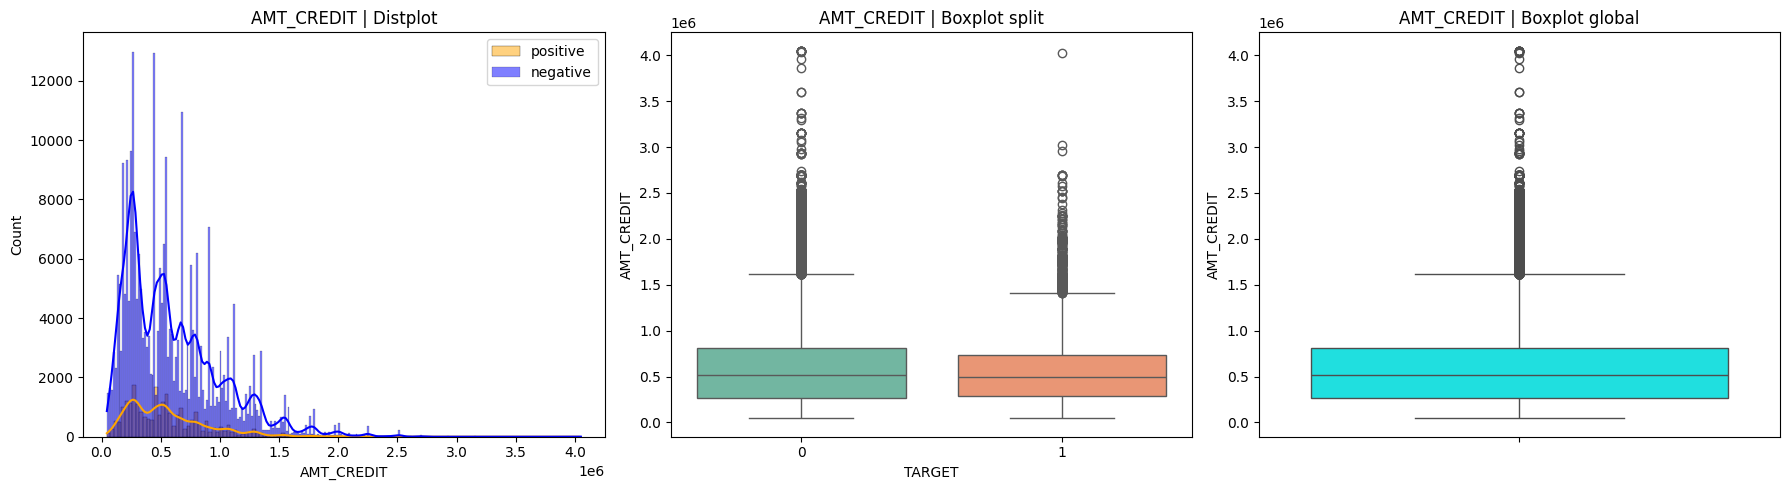

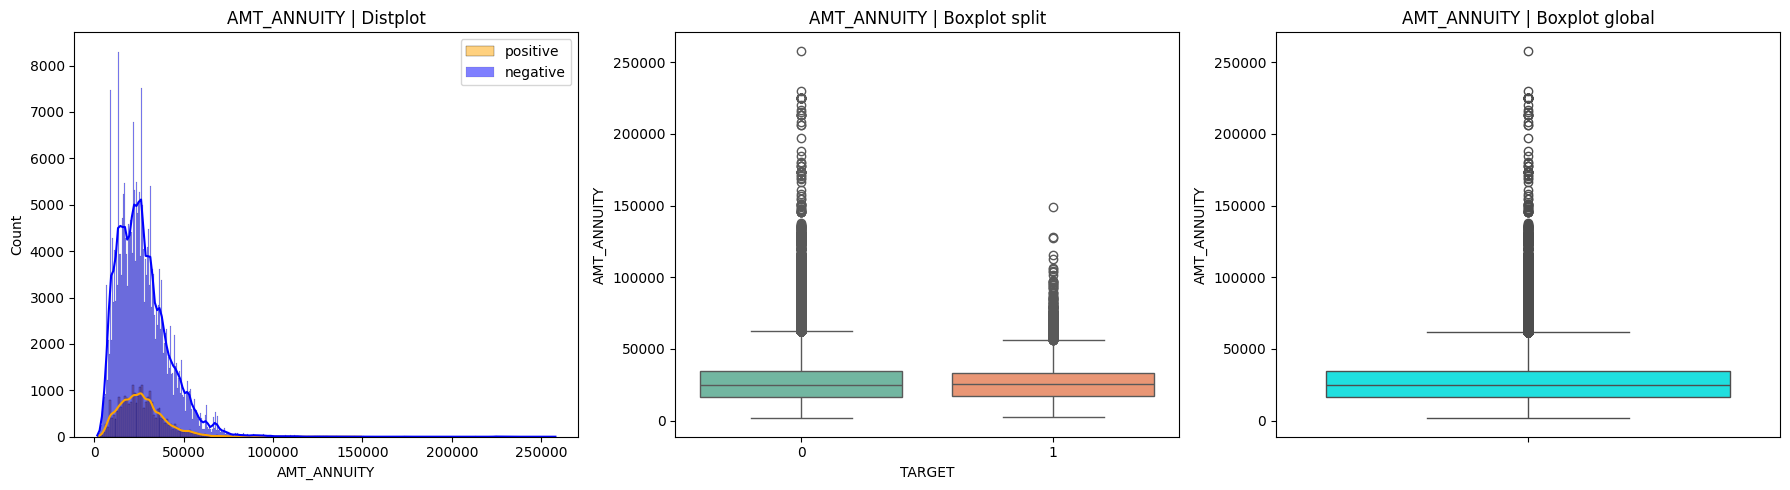

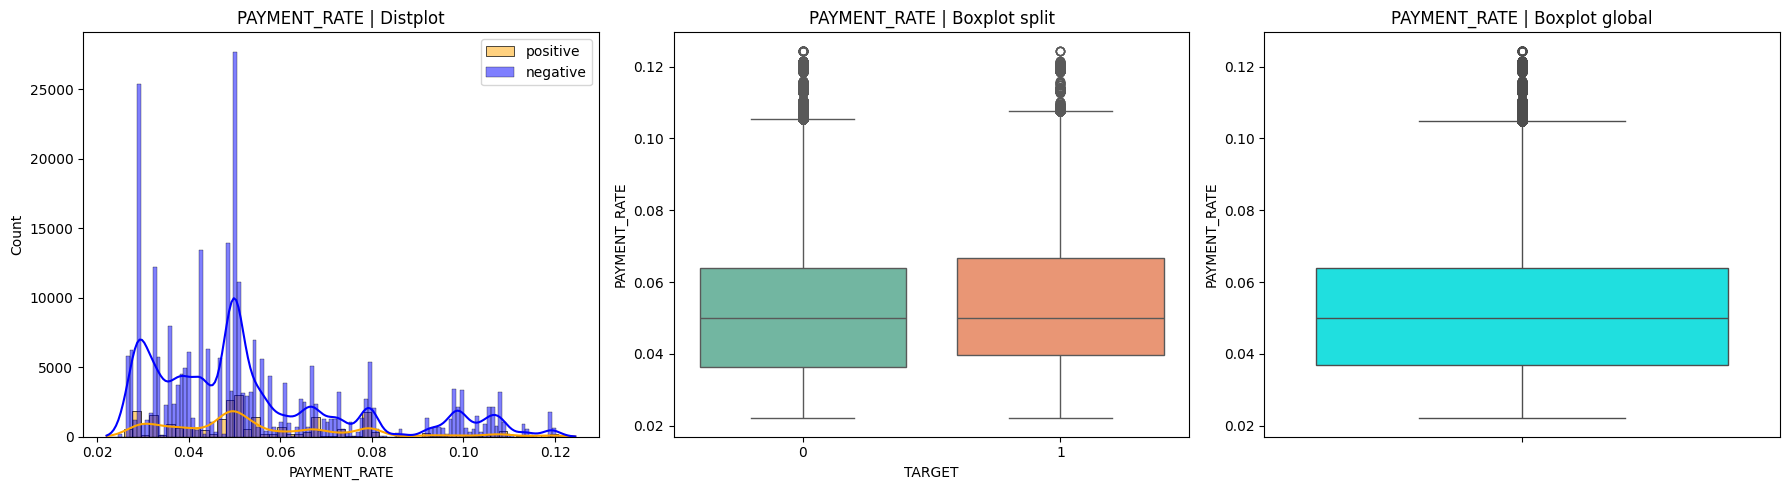

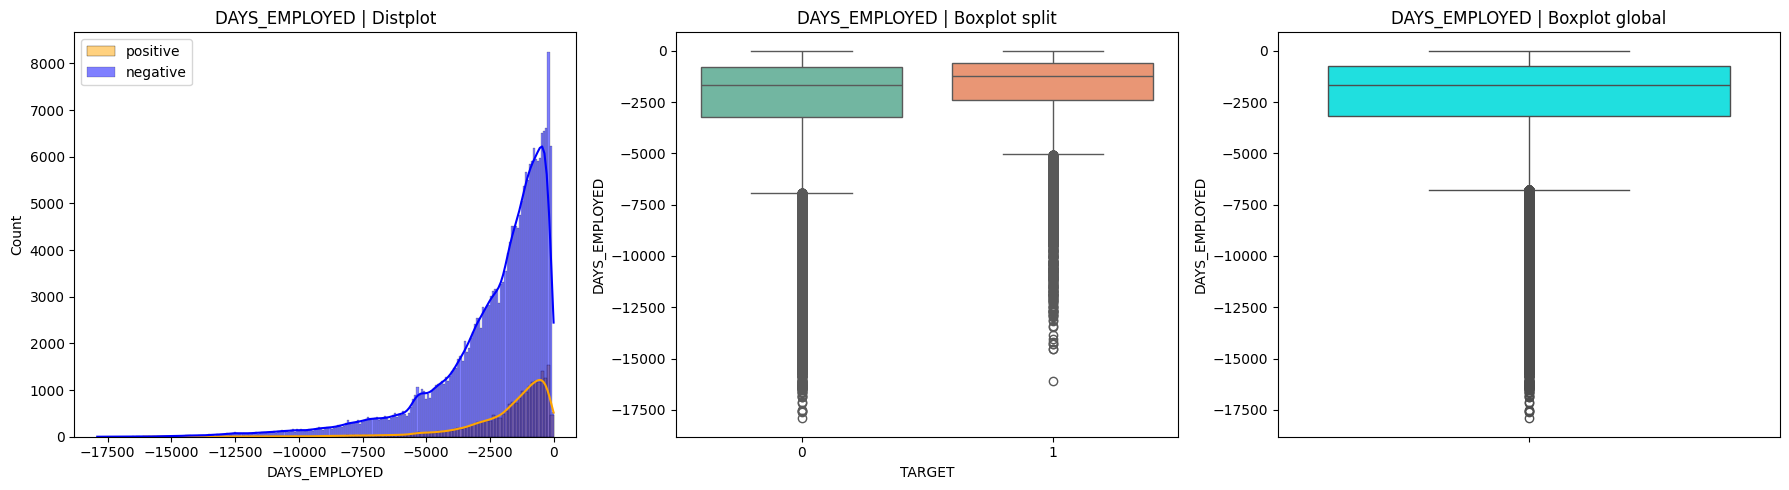

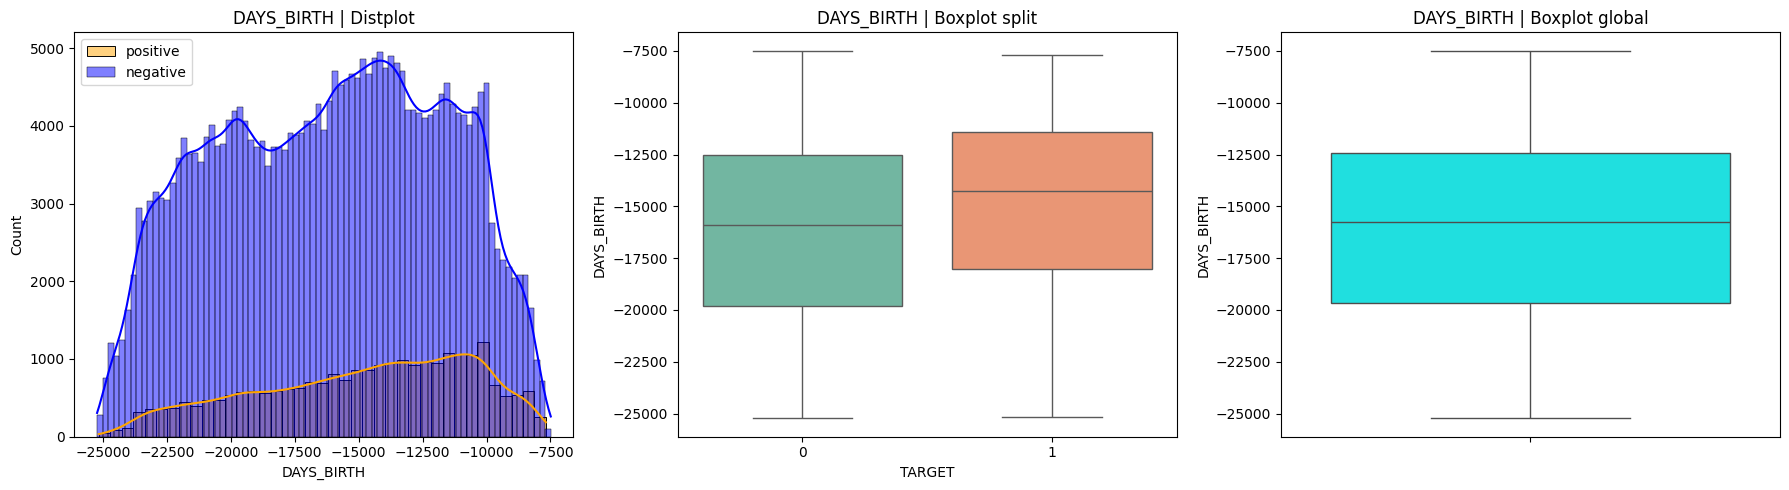

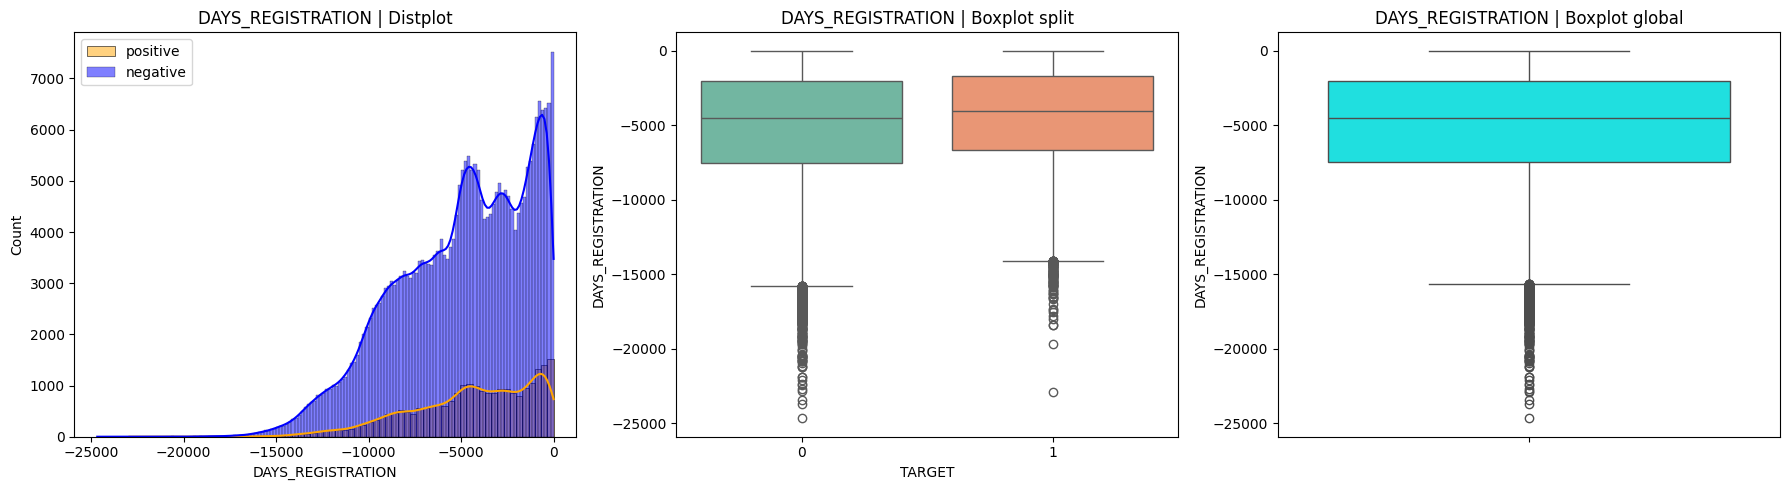

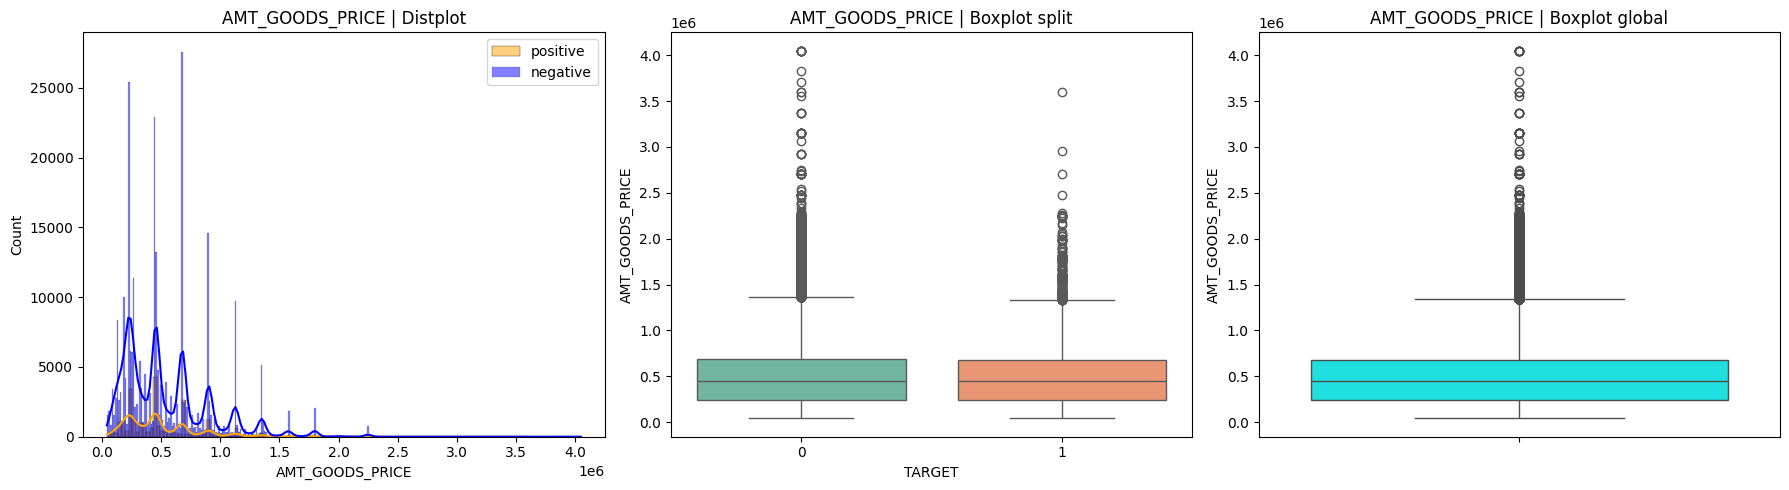

In [181]:
# Calculer des variables supplémentaires si nécessaire
# Taux de paiement = AMT_ANNUITY / AMT_CREDIT
data['PAYMENT_RATE'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']

# Colonnes spécifiques à analyser
columns_analyse = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'PAYMENT_RATE', 
                   'DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'AMT_GOODS_PRICE']

# Filtrer les données pour ne garder que les lignes avec des valeurs valides dans TARGET (0 ou 1)
data_filtered = data[data["TARGET"].notna()]  # Garde les lignes où TARGET est 0 ou 1

# Séparer les groupes en fonction de la variable TARGET
positive_target = data_filtered[data_filtered["TARGET"] == 1]
negative_target = data_filtered[data_filtered['TARGET'] == 0]

# Ajuster la taille de la figure en fonction du nombre de colonnes à analyser
for col in columns_analyse:
    plt.figure(figsize=(18, 5))
    
    # 1. Distribution (Histplot)
    plt.subplot(1, 3, 1)
    sns.histplot(positive_target[col], label='positive', color='orange', kde=True)
    sns.histplot(negative_target[col], label='negative', color='blue', kde=True)
    plt.title(f"{col} | Distplot")
    plt.legend()
    
    # 2. Boxplot divisé par TARGET
    plt.subplot(1, 3, 2)
    sns.boxplot(x="TARGET", y=col, data=data_filtered, palette="Set2")
    plt.title(f"{col} | Boxplot split")
    
    # 3. Boxplot global (sans distinction de TARGET)
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data_filtered[col], color='cyan')
    plt.title(f"{col} | Boxplot global")
    
    plt.tight_layout()
    plt.show()

## Fusion des autres fichiers, encodage et créations d'autres variables

On reprend le même principe pour les autres fichiers et on les ajoute à notre fichier de data. La jonction se fait grâce au SK_ID_CURR

Pour se faire, on récupère des méthodes du script du fichier lightGBM_script.ipynb, qui est un script provenant d'un kernel Kaggle, et permettant d'aller plus vite sur la préparation des données

Fichiers Bureau et bureau_balance

In [182]:
# Charger les fichiers
bureau = pd.read_csv('bureau.csv')
bb = pd.read_csv('bureau_balance.csv')

# 1) Agréger bureau_balance par SK_ID_BUREAU
bureau_balance_agg = bb.groupby('SK_ID_BUREAU').agg(
    MONTHS_BALANCE_min=('MONTHS_BALANCE', 'min'),
    MONTHS_BALANCE_max=('MONTHS_BALANCE', 'max'),
    MONTHS_BALANCE_size=('MONTHS_BALANCE', 'size'),
)
bureau = bureau.merge(bureau_balance_agg, how='left', left_on='SK_ID_BUREAU', right_index=True)

# 2) Agréger bureau par SK_ID_CURR (1 ligne par client)
bureau_agg = bureau.groupby('SK_ID_CURR').agg(
    BUREAU_count=('SK_ID_BUREAU', 'count'),
    DAYS_CREDIT_mean=('DAYS_CREDIT', 'mean'),
    AMT_CREDIT_SUM_mean=('AMT_CREDIT_SUM', 'mean'),
    AMT_CREDIT_SUM_max=('AMT_CREDIT_SUM', 'max'),
    AMT_CREDIT_SUM_DEBT_mean=('AMT_CREDIT_SUM_DEBT', 'mean'),
    MONTHS_BALANCE_min_min=('MONTHS_BALANCE_min', 'min'),
    MONTHS_BALANCE_max_max=('MONTHS_BALANCE_max', 'max'),
    MONTHS_BALANCE_size_sum=('MONTHS_BALANCE_size', 'sum'),
)

# 3) Join propre (une seule ligne par SK_ID_CURR)
data = data.join(bureau_agg, how='left', on='SK_ID_CURR')

del bureau, bb


Fichier previous_application



In [183]:
# Charger le fichier 'previous_application.csv'
prev = pd.read_csv('previous_application.csv')

# Supposons que la fonction 'dth.previous_applications()' applique des agrégations sur 'previous_application'
# Agréger les données par 'SK_ID_CURR'
prev_agg = prev.groupby('SK_ID_CURR').agg({
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean'],
}).reset_index()

# Renommer les colonnes pour éviter les conflits après la jointure
prev_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in prev_agg.columns]

# Afficher la taille des données 'prev_agg'
print(f"Previous application data contient {prev_agg.shape[0]} lignes et {prev_agg.shape[1]} colonnes.")

# Joindre les données 'prev_agg' avec le DataFrame 'data' sur 'SK_ID_CURR'
data = data.join(prev_agg.set_index('SK_ID_CURR'), how='left', on='SK_ID_CURR')

# Libérer de la mémoire en supprimant 'prev'
del prev

Previous application data contient 338857 lignes et 11 colonnes.


Fichier POS-CASH balance



In [184]:
# Charger le fichier 'POS_CASH_balance.csv'
pos = pd.read_csv('POS_CASH_balance.csv')

# Agréger les données par 'SK_ID_CURR'
pos_agg = pos.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'size'],
    'SK_DPD': ['min', 'max', 'mean'],     # Nombre de jours de retard sur le paiement
    'SK_DPD_DEF': ['min', 'max', 'mean']  # Nombre de jours de retard significatif
}).reset_index()

# Renommer les colonnes pour éviter les conflits après la jointure
pos_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in pos_agg.columns]

# Afficher la taille des données 'pos_agg'
print(f"POS-CASH balance data contient {pos_agg.shape[0]} lignes et {pos_agg.shape[1]} colonnes.")

# Joindre les données 'pos_agg' avec le DataFrame 'data' sur 'SK_ID_CURR' en ajoutant des suffixes
data = data.join(pos_agg.set_index('SK_ID_CURR'), how='left', on='SK_ID_CURR', lsuffix='_data', rsuffix='_pos')

# Libérer de la mémoire en supprimant 'pos'
del pos

POS-CASH balance data contient 337252 lignes et 10 colonnes.


In [185]:
# Charger le fichier 'installments_payments.csv'
ins = pd.read_csv('installments_payments.csv')

# Agréger les données par 'SK_ID_CURR'
ins_agg = ins.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_VERSION': 'nunique',  # Nombre unique de versions d'installment
    'NUM_INSTALMENT_NUMBER': 'max',       # Numéro maximum d'installment
    'DAYS_INSTALMENT': ['min', 'max', 'mean'],   # Jours des installments
    'DAYS_ENTRY_PAYMENT': ['min', 'max', 'mean'], # Jours d'entrée du paiement
    'AMT_INSTALMENT': ['min', 'max', 'mean'],    # Montant des installments
    'AMT_PAYMENT': ['min', 'max', 'mean'],       # Montant payé
}).reset_index()

# Renommer les colonnes pour éviter les conflits après la jointure
ins_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in ins_agg.columns]

# Afficher la taille des données 'ins_agg'
print(f"Installments payments data contient {ins_agg.shape[0]} lignes et {ins_agg.shape[1]} colonnes.")

# Joindre les données 'ins_agg' avec le DataFrame 'data' sur 'SK_ID_CURR'
data = data.join(ins_agg.set_index('SK_ID_CURR'), how='left', on='SK_ID_CURR', lsuffix='_data', rsuffix='_ins')

# Libérer de la mémoire en supprimant 'ins'
del ins

Installments payments data contient 339587 lignes et 15 colonnes.


Fichier credit card balance

In [186]:
# Charger le fichier 'credit_card_balance.csv'
cc = pd.read_csv('credit_card_balance.csv')

# Agréger les données par 'SK_ID_CURR'
cc_agg = cc.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean', 'size'],  # Mois du solde
    'AMT_BALANCE': ['min', 'max', 'mean'],             # Montant du solde
    'AMT_CREDIT_LIMIT_ACTUAL': ['min', 'max', 'mean'], # Limite de crédit
    'AMT_DRAWINGS_ATM_CURRENT': ['min', 'max', 'mean'],# Montants des retraits aux distributeurs
    'AMT_DRAWINGS_CURRENT': ['min', 'max', 'mean'],    # Montants des retraits
    'AMT_PAYMENT_CURRENT': ['min', 'max', 'mean'],     # Paiement actuel
    'AMT_TOTAL_RECEIVABLE': ['min', 'max', 'mean'],    # Montants totaux à recevoir
    'CNT_DRAWINGS_ATM_CURRENT': ['min', 'max', 'mean'],# Nombre de retraits aux distributeurs
    'SK_DPD': ['min', 'max', 'mean'],                  # Nombre de jours de retard
    'SK_DPD_DEF': ['min', 'max', 'mean'],              # Nombre de jours de retard significatif
}).reset_index()

# Renommer les colonnes pour éviter les conflits après la jointure
cc_agg.columns = ['_'.join(col).strip() if col[1] else col[0] for col in cc_agg.columns]

# Afficher la taille des données 'cc_agg'
print(f"Credit card balance data contient {cc_agg.shape[0]} lignes et {cc_agg.shape[1]} colonnes.")

# Joindre les données 'cc_agg' avec le DataFrame 'data' sur 'SK_ID_CURR'
data = data.join(cc_agg.set_index('SK_ID_CURR'), how='left', on='SK_ID_CURR', lsuffix='_data', rsuffix='_cc')

# Libérer de la mémoire en supprimant 'cc'
del cc

Credit card balance data contient 103558 lignes et 32 colonnes.


On sauvegarde le data final dans le fichier merge.csv, qui nou servira ensuite dans le notebook pour l'entraînement des modèles de Machine Learning

In [188]:
# ===============================
# Encodage final des variables catégorielles
# ===============================

# Vérification de la présence de la cible
assert 'TARGET' in data.columns, "TARGET manquante avant encodage"

# Séparation temporaire de la cible
target = data['TARGET']
data_features = data.drop(columns=['TARGET'])

# Identification des colonnes catégorielles
categorical_columns = data_features.select_dtypes(include=['object', 'category']).columns

print(f"{len(categorical_columns)} colonnes catégorielles à encoder")

# One-Hot Encoding (choix simple, robuste, sans ordre artificiel)
data_encoded = pd.get_dummies(
    data_features,
    columns=categorical_columns,
    drop_first=True
)

# Réintégration de la cible
data_encoded['TARGET'] = target

# Cast explicite de la cible en int (gestion des NaN)
data_encoded['TARGET'] = data_encoded['TARGET'].astype('Int64')  # int nullable pandas


# Mise à jour du dataset principal
data = data_encoded

# Vérification finale
print("Encodage terminé")
print(f"Data shape : {data.shape}")
print("TARGET présente :", 'TARGET' in data.columns)


16 colonnes catégorielles à encoder
Encodage terminé
Data shape : (356251, 306)
TARGET présente : True


In [189]:
# Vérification et correction finale des colonnes object
object_cols = data.select_dtypes(include="object").columns
print("Colonnes object restantes :", object_cols)

# Cas le plus fréquent : SK_ID_CURR
if "SK_ID_CURR" in object_cols:
    data["SK_ID_CURR"] = data["SK_ID_CURR"].astype(int)

# Vérification finale
print("Nb colonnes object restantes après correction :", 
      data.select_dtypes(include="object").shape[1])


Colonnes object restantes : Index([], dtype='object')
Nb colonnes object restantes après correction : 0


In [190]:
data.to_csv('merge50.csv', index=False)

# Conclusion de l'analyse exploratoire

Les étapes de nettoyage, d'imputation et de sélection des variables ont permis de construire
un jeu de données exploitable pour la modélisation.

Ce dataset sera utilisé dans un second notebook afin de comparer :
- un modèle de référence (baseline),
- un modèle plus récent issu d’une veille en machine learning.


In [191]:
# Copie finale du dataset après feature engineering
df_final = data.copy()

# Séparation des features et de la cible
X = df_final.drop(columns=["TARGET"])
y = df_final["TARGET"]

# Vérification
print("Dataset final figé")
print("X shape :", X.shape)
print("y shape :", y.shape)


Dataset final figé
X shape : (356251, 305)
y shape : (356251,)


# Le DataFrame 'data' correspond au dataset final après toutes les étapes de feature engineering

In [192]:
print("Rows:", data.shape[0])
print("TARGET présente:", "TARGET" in data.columns)
print("Nb colonnes object restantes:", data.select_dtypes(include="object").shape[1])


Rows: 356251
TARGET présente: True
Nb colonnes object restantes: 0
